## Objective

### This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
##to get the complete picture
pd.set_option('display.width', 1500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
##Read the application data, storing the data in 'app'
##Print the first 5 rows to check the 
app=pd.read_csv('application_data.csv')
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130                0.0773    

In [4]:
##Checking the shape of the application data
app.shape

(307511, 122)

In [5]:
##Check the info of application data_set
app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [6]:
##Check description of the application dataset
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490        0.145193        0.222315

In [7]:
##Lets now check the previous application
prev=pd.read_csv('previous_application.csv')
prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [8]:
##Checking the shape of the previous application
prev.shape

(1670214, 37)

In [9]:
##Checking the info
prev.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

## Checking the null values for each data set and taking deciding what to be done after checking the percentage null of each attribute.

### For application data set

In [11]:
##Checking the % nulls for each attributes, storing in app_null
app_null=((app.isnull().sum()/app.shape[0])*100).round(2)
app_null

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

### On checking the percentage values we see some irrelevant columns with high percentage of missing values, so let's drop the values for the columns having more than 35% missing values.

In [12]:
app=app.loc[:,app_null<=35]

In [13]:
((app.isnull().sum()/app.shape[0])*100).round(2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

### For previous application data set

In [14]:
##Checking the % null for the previous application, storing it in prev_null
prev_null=(prev.isnull().sum()/prev.shape[0]*100).round(2)
prev_null

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

### So let's go with the thumb rule, we are keeping all the columns where the null values are less than 50% and dropping off those where it is more than 50%. We will further evaluate what type of null  it is and hence would see if we can drop the columns with higher null %.

In [15]:
prev=prev.loc[:, prev_null<50]

In [16]:
(prev.isnull().sum()/prev.shape[0]*100).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

### Inspecting columns with higher null values, the ones with more than 30% to understand what sort of null value it is.

In [17]:
prev[prev['DAYS_FIRST_DRAWING'].isnull()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE     NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP         PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
4           1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC             NaN         Repeater                     XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high           Cash Street: high                 NaN             NaN                        NaN            NaN               NaN                        NaN
6           2315218      175704         Cash loans          NaN              0.0         0.0              NaN                    TUESDAY                       11                           Y                       1                    XNA             Canceled            -14                    XNA                XAP             NaN         Repeater                     XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                        Cash                 NaN             NaN                        NaN            NaN               NaN                        NaN
7           1656711      296299         Cash loans          NaN              0.0         0.0              NaN                     MONDAY                        7                           Y                       1                    XNA             Canceled            -21                    XNA                XAP             NaN         Repeater                     XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                        Cash                 NaN             NaN                        NaN            NaN               NaN                        NaN
8           2367563      342292         Cash loans          NaN              0.0         0.0              NaN                     MONDAY                       15                           Y                       1                    XNA             Canceled           -386                    XNA                XAP             NaN         Repeater                     XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                        Cash                 NaN             NaN                        NaN            NaN               NaN                        NaN
9           2579447      334349         Cash loans          NaN              0.0         0.0              NaN                   SATURDAY                       15                           Y                       1                    XNA             Canceled            -57                    XNA                XAP             NaN         Repeater                     XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                        Cash                 NaN             NaN                        NaN            NaN               NaN                        NaN
...             ...         ...                ...          ...              ...         ...              ...

### Checking the null values for the 40% missing, we could see that the columns have all missing even though the loan was disbursed, therefore it certainly means that these values ought to be there but they are not. Might be possible that the data has not been recorded  properly and  hence we can treat this miss outs as missing completely at random because there is no dependency of such attributes on any other atribute. So, let's drop the attributes and only keep those which have a missing percentage of less than 35%.

In [18]:
prev=prev.loc[:, prev_null<35]

In [19]:
##Checking the null percentage now for previous application.
(prev.isnull().sum()/prev.shape[0]*100).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

## Working with the application data

### Before proceeding with the analysis, let's chalk out the columns that is not  required for the analysis.

In [20]:
columns_not_required=['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
         'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
         'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
         'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2','EXT_SOURCE_3']

In [21]:
app.drop(columns=columns_not_required,inplace=True)

In [22]:
app.shape

(307511, 31)

# Missing Value check and Suggested Imputatations

### Checking for gender column

In [23]:
##Count for the gender column
app['CODE_GENDER'].value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

#### There is a third gender category which is XNA which is can be thought as the person pulled the data might have missed the gender of that particular entry and hence we can see that women are applying for the loans maximum times or may be there could be some people who are not willing to mention their gender, so we can simply impute there 'F' as Female as the percentage is higher and  it would not skew the analysis.

In [24]:
app['CODE_GENDER']=app['CODE_GENDER'].apply(lambda x: app['CODE_GENDER'].mode()[0] if x=='XNA' else x)

In [25]:
app['CODE_GENDER'].value_counts(normalize=True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

### Checking for Occupation Type column

In [26]:
## Count of Occupation type in application data
app['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### Suggestion of imputation: In this attribute there are 31% of null values, here we can definitely impute the null values with the mode  which in our case is 'Labourers' .

### Checking for Organization Type column

In [27]:
##Checking the counts for Organization types.
app['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Suggested Imputation: Since the organization type cannot be replaced with mode as same cannot be determined for the people who have not mentioned as these values could be 'Missing at Random', hence for the people who have not provided the values as XNA so we replace the same with NaN's.

In [28]:
app['ORGANIZATION_TYPE']=app['ORGANIZATION_TYPE'].replace('XNA', np.NaN)

In [29]:
((app.isnull().sum()/app.shape[0])*100).round(2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
ORGANIZATION_TYPE              18.01
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
A

### Checking for the Credit Bureau Columns

In [30]:
app['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

#### Suggestion: Since the mean and median are both zero we can impute with any of them, let's say median in this case to have a balanced and unbiased distribution.

In [31]:
app['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

#### Suggestion: Since the median is zero we can use this median value to impute to maintain a stable and unbiased distribution in replacing the missing data . 

In [32]:
app['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

#### Suggestion: Since the median is zero we can use this median value to impute to maintain a stable and unbiased distribution while replacing the missing data.

In [33]:
app['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

#### Suggestion: We can use the median value to impute to maintain a stable and unbiased distribution while replacing the missing data.

In [34]:
app['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

#### Suggestion: Since the mean and median are both zero we can impute with any them, let's say mean this time.

## Data Type check and changing if required

### For Credit Bureau Columns and Count Fam 

In [35]:
print (type(np.NaN))

<class 'float'>


#### Since there are some attributes which are not in the correct data type , like AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON ,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR and CNT_FAM_MEMBERS with some null values. The data type of these columns cannot be changed  as it has NaN values and as displayed in the above code block that NaN values are itself of float types, hence the data type of such columns could not be  changed until the missing values imputations are done.

### Checking all the Days_cols and rectifying values if required.

In [36]:
app['DAYS_ID_PUBLISH']

0        -2120
1         -291
2        -2531
3        -2437
4        -3458
          ... 
307506   -1982
307507   -4090
307508   -5150
307509    -931
307510    -410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64

#### Observation: Since the days column in the attributes info represents the number of days ago some details were changed and that is why a negative sign has been provided. Therefore changing the values to positive as days cannot be negative for the all days columns.

In [37]:
new_list=[]
for i in app.columns:
    if i.startswith('DAYS'):
        new_list.append(i)
        
for i in new_list:
    app[i]=app[i].apply(lambda x:abs(x))

In [38]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment        9461            637             3648.0             2120        Laborers              1.0                     2                            2  Business Entity Type 3                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment       16765           1188             1186.0              291      Core staff              2.0                     1                            1                  School                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment       19046            225             4260.0             2531        Laborers              1.0                     2                            2              Government                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
3      100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0   Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment       19005           3039             9833.0             2437        Laborers              2.0                     2                            2  Business Entity Type 3                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
4      100007       0         Cash loans           M            N               Y             0          121500.0    513000.0      21865.5         513000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment       19932           3038             4311.0             3458      Core staff              1.0                     2                            2                Religion                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0

### Hence, all the days columns are rectified.

# Adding new features to make our analysis more comprehensive.

#### Adding 'Years_Birth' Attribute to represent clients age, deriving it from the 'DAYS_BIRTH' Column.

In [39]:
app['Years_Birth']=app['DAYS_BIRTH']/365

#### Adding Age_bucket from  the 'Years_Birth Column to represent the bucket in which a client's age fall.

In [40]:
app['Age_bucket']=pd.cut(app.loc[:,'Years_Birth'], bins=np.linspace(20,70,11))

In [41]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  Years_Birth    Age_bucket
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment        9461            637             3648.0             2120        Laborers              1.0                     2                            2  Business Entity Type 3                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0    25.920548  (25.0, 30.0]
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment       16765           1188             1186.0              291      Core staff              2.0                     1                            1                  School                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    45.931507  (45.0, 50.0]
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment       19046            225             4260.0             2531        Laborers              1.0                     2                            2              Government                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    52.180822  (50.0, 55.0]
3      100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0   Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment       19005           3039             9833.0             2437        Laborers              2.0                     2                            2  Business Entity Type 3                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN    52.068493  (50.0, 55.0]
4      100007       0         Cash loans           M            N               Y             0          121500.0    513000.0      21865.5         513000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment       19932           3038             4311.0             3458      Core staff              1.0                     2                            2                Religion                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    54.608219  (50.0, 55.0]

### Binning two attributes to make visualizations more comprehensive.

#### Bucketing the Amt_credit and storing it in Credit_bucket.

In [42]:
app['Credit_bucket']=pd.qcut(app['AMT_CREDIT'], [0,0.2,0.4,0.6,0.8,1],['Low','Standard','Medium','High','Very-High'])

#### Bucketing the Amt_Income_Total and storing it in Income_group.

In [43]:
app['Income_group']=pd.qcut(app['AMT_INCOME_TOTAL'], [0,0.2,0.4,0.6,0.8,1], labels=['Very Low Income', 'Low Income','Medium Income','Standard Income','High Income'])

In [44]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  Years_Birth    Age_bucket Credit_bucket     Income_group
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment        9461            637             3648.0             2120        Laborers              1.0                     2                            2  Business Entity Type 3                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0    25.920548  (25.0, 30.0]      Standard  Standard Income
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment       16765           1188             1186.0              291      Core staff              2.0                     1                            1                  School                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    45.931507  (45.0, 50.0]     Very-High      High Income
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment       19046            225             4260.0             2531        Laborers              1.0                     2                            2              Government                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    52.180822  (50.0, 55.0]           Low  Very Low Income
3      100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0   Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment       19005           3039             9833.0             2437        Laborers              2.0                     2                            2  Business Entity Type 3                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN    52.068493  (50.0, 55.0]      Standard       Low Income
4      100007       0         Cash loans           M            N               Y             0          121500.0    513000.0      21865.5         513000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment       19932           3038             4311.0             3458      Core staff              1.0                     2                            2                Religion                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    54.608219  (50.0, 55.0]        Medium       Low Income

## Imbalace Ratio for Target 0 and 1

- 1 indicates the count of clients having difficulty in paying back the loan
- 0 indicates the count of clients not having payment difficulties 

In [45]:
app['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

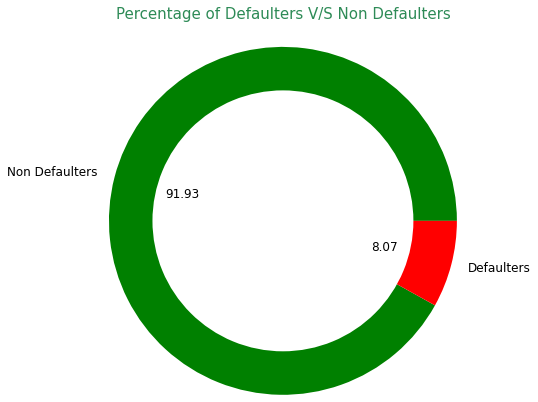

In [46]:
plt.figure.figsize=[9,10]
plt.pie(app['TARGET'].value_counts(normalize=True),colors=['Green','Red'],labels=['Non Defaulters','Defaulters'],autopct='%.2f',textprops={'fontsize': 12}, radius=2)
plt.pie([1], colors=['w'], radius=1.5)
plt.title('Percentage of Defaulters V/S Non Defaulters\n\n\n\n\n', fontdict={'size':15, 'color':'Seagreen'})
plt.show()

In [47]:
print(" Imbalance ratio is :",(app['TARGET'].value_counts().mode()[0]/app['TARGET'].value_counts().mode()[1]))

 Imbalance ratio is : 0.08781828601345662


### Observation:

- There are lesser number of people who are facing payment difficulties as compared to the people who are not facing any     issues
- It means that bank is vigilant about such things  which is really good, but there are still improvement areas which needs   to be focused to make the lending more accurate

## Now let us do the segregation between two target variables i.e. 0 and 1 and continue our analysis.

In [48]:
target0=app[app['TARGET']==0]
target1=app[app['TARGET']==1]

In [49]:
target0.reset_index(drop=True,inplace=True)

In [50]:
target1.reset_index(drop=True,inplace=True)

In [51]:
target0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  Years_Birth    Age_bucket Credit_bucket     Income_group
0      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family    State servant               Higher education               Married  House / apartment       16765           1188             1186.0              291      Core staff              2.0                     1                            1                  School                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    45.931507  (45.0, 50.0]     Very-High      High Income
1      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment       19046            225             4260.0             2531        Laborers              1.0                     2                            2              Government                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    52.180822  (50.0, 55.0]           Low  Very Low Income
2      100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0    Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment       19005           3039             9833.0             2437        Laborers              2.0                     2                            2  Business Entity Type 3                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN    52.068493  (50.0, 55.0]      Standard       Low Income
3      100007       0         Cash loans           M            N               Y             0          121500.0    513000.0      21865.5         513000.0    Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment       19932           3038             4311.0             3458      Core staff              1.0                     2                            2                Religion                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    54.608219  (50.0, 55.0]        Medium       Low Income
4      100008       0         Cash loans           M            N               Y             0           99000.0    490495.5      27517.5         454500.0  Spouse, partner    State servant  Secondary / secondary special               Married  House / apartment       16941           1588             4970.0              477        Laborers              2.0                     2                            2                   Other                         0.0                        0.0                         0.0                        0.0                        1.0                         1.0    46.413699  (45.0, 50.0]        Medium  Very Low Income

In [52]:
target1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  Years_Birth    Age_bucket Credit_bucket     Income_group
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment        9461            637             3648.0             2120        Laborers              1.0                     2                            2  Business Entity Type 3                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0    25.920548  (25.0, 30.0]      Standard  Standard Income
1      100031       1         Cash loans           F            N               Y             0          112500.0    979992.0      27076.5         702000.0   Unaccompanied               Working  Secondary / secondary special                 Widow  House / apartment       18724           2628             6573.0             1827   Cooking staff              1.0                     3                            2  Business Entity Type 3                         0.0                        0.0                         0.0                        0.0                        2.0                         2.0    51.298630  (50.0, 55.0]     Very-High       Low Income
2      100047       1         Cash loans           M            N               Y             0          202500.0   1193580.0      35028.0         855000.0   Unaccompanied  Commercial associate  Secondary / secondary special               Married  House / apartment       17482           1262             1182.0             1029        Laborers              2.0                     2                            2  Business Entity Type 3                         0.0                        0.0                         0.0                        2.0                        0.0                         4.0    47.895890  (45.0, 50.0]     Very-High  Standard Income
3      100049       1         Cash loans           F            N               N             0          135000.0    288873.0      16258.5         238500.0   Unaccompanied               Working  Secondary / secondary special        Civil marriage  House / apartment       13384           3597               45.0             4409     Sales staff              2.0                     3                            3           Self-employed                         0.0                        0.0                         0.0                        0.0                        0.0                         2.0    36.668493  (35.0, 40.0]      Standard       Low Income
4      100096       1         Cash loans           F            N               Y             0           81000.0    252000.0      14593.5         252000.0   Unaccompanied             Pensioner  Secondary / secondary special               Married  House / apartment       24794         365243             5391.0             4199             NaN              2.0                     2                            2                     NaN                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    67.928767  (65.0, 70.0]           Low  Very Low Income

# Sanity Check

### Checking info of the target columns, this would make a clear understanding as what all attributes will be in our final analysis dataset.

In [53]:
target0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282686 entries, 0 to 282685
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   282686 non-null  int64   
 1   TARGET                       282686 non-null  int64   
 2   NAME_CONTRACT_TYPE           282686 non-null  object  
 3   CODE_GENDER                  282686 non-null  object  
 4   FLAG_OWN_CAR                 282686 non-null  object  
 5   FLAG_OWN_REALTY              282686 non-null  object  
 6   CNT_CHILDREN                 282686 non-null  int64   
 7   AMT_INCOME_TOTAL             282686 non-null  float64 
 8   AMT_CREDIT                   282686 non-null  float64 
 9   AMT_ANNUITY                  282674 non-null  float64 
 10  AMT_GOODS_PRICE              282429 non-null  float64 
 11  NAME_TYPE_SUITE              281464 non-null  object  
 12  NAME_INCOME_TYPE             282686 non-null

### Checking how many columns are there for each type i.e Numerical and Categorical

In [54]:
##Storing all the numerical data type attributes in a list of numeric_cols
numeric_cols=[i for i in target1.columns if target1[i].dtype in ('int64','float64','int32')]

In [55]:
numeric_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'Years_Birth']

In [56]:
##Storing all the categorical data type attributes in a list of cat_cols 
cat_cols=[i for i in target1.columns if target1[i].dtype not in ('int64','float64','int32')]

In [57]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'Age_bucket',
 'Credit_bucket',
 'Income_group']

### Checking shape of each segmented dataframes.

In [58]:
target0.shape

(282686, 35)

In [59]:
target1.shape

(24825, 35)

# Univariate(Numerical) Analysis

## Analysis of Income

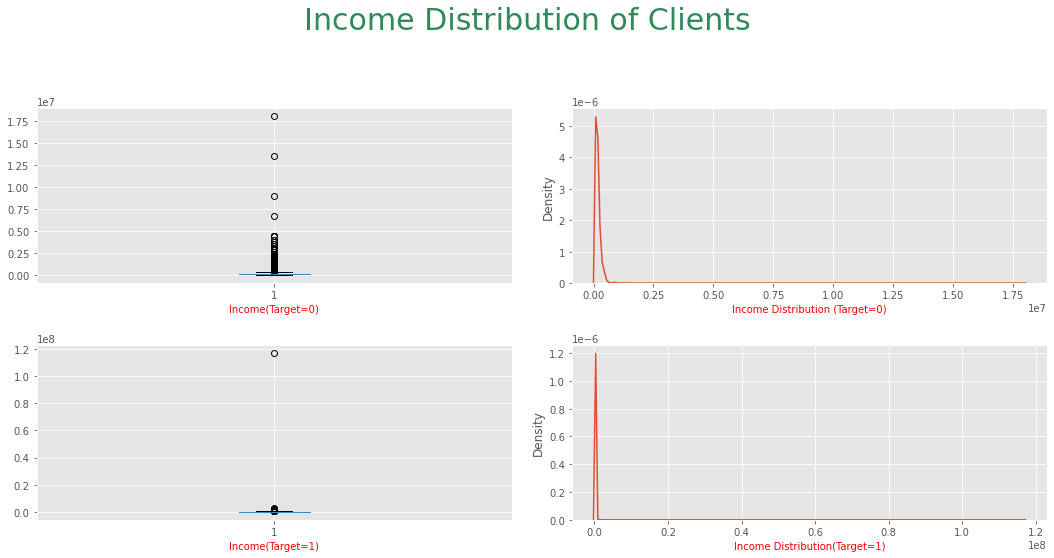

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=[15,8])

plt.gcf().suptitle("Income Distribution of Clients\n",fontsize=30,color='Seagreen')

plt.subplot(2,2,1)
plt.boxplot(target0['AMT_INCOME_TOTAL'])
plt.xlabel('Income(Target=0)',fontdict={'fontsize':10, 'color':'Red'})
plt.subplot(2,2,2)
sns.distplot(target0['AMT_INCOME_TOTAL'], kde=True, hist=False)
plt.xlabel('Income Distribution (Target=0)',fontdict={'fontsize':10, 'color':'Red'})

plt.subplot(2,2,3)
plt.boxplot(target1['AMT_INCOME_TOTAL'])
plt.xlabel('Income(Target=1)',fontdict={'fontsize':10, 'color':'Red'})
plt.subplot(2,2,4)
sns.distplot(target1['AMT_INCOME_TOTAL'], kde=True, hist=False)
plt.xlabel('Income Distribution(Target=1)',fontdict={'fontsize':10, 'color':'Red'})

plt.tight_layout(pad=2.0)

plt.show()

### Inferences for Target=0

- From the above graph we can identify that there are few marginal outliers in the income group that have have values distant from the rest of the values.
- We can understand that majority of the non defaulters lie under a minimal income range and as there are few under high income range.

### Inferences for Target=1

- Here we are able to see a value which is detached from the main body and that is definitely an outlier. 
- We can visualize that the distribution of income is right skewed  which eventually indicates that some people defaulting   on loans have higher income but they are not able to pay it off because the sanctioned loan amount might be higher than the returns that they received.
- Outlier can be controlled by limiting the income range until 1000000 which would give us a better picture.
- As compared with the Target=0 income people, people in Target=1 has comparitively lower income.

## Analysis of Credit

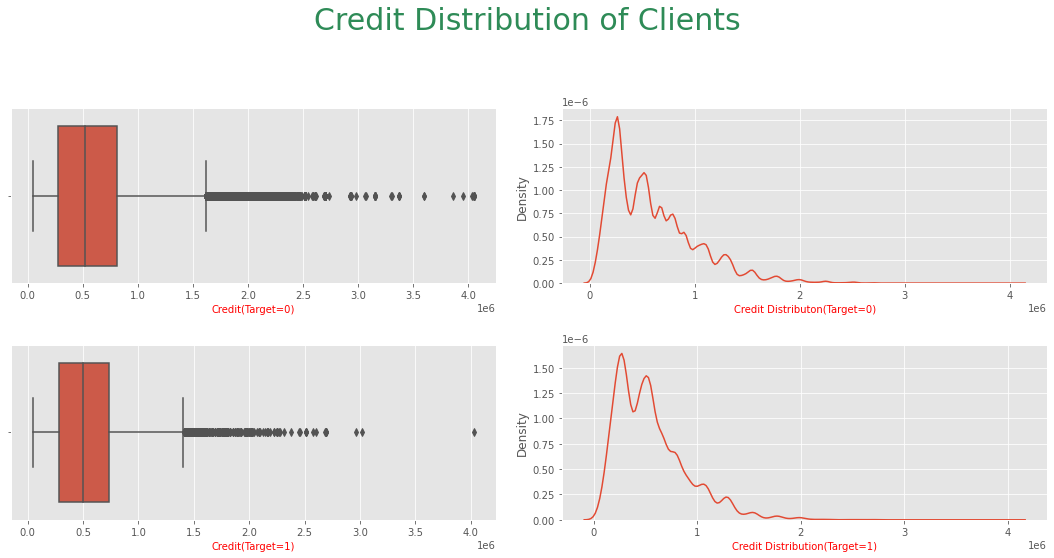

In [61]:
plt.style.use('ggplot')
plt.figure(figsize=[15,8])

plt.gcf().suptitle("Credit Distribution of Clients\n",fontsize=30,color='Seagreen')

plt.subplot(2,2,1)
sns.boxplot(target0['AMT_CREDIT'])
plt.xlabel('Credit(Target=0)',fontdict={'fontsize':10, 'color':'Red'})
plt.subplot(2,2,2)
sns.distplot(target0['AMT_CREDIT'], kde=True,hist=False)
plt.xlabel('Credit Distributon(Target=0)',fontdict={'fontsize':10, 'color':'Red'})

plt.subplot(2,2,3)
sns.boxplot(target1['AMT_CREDIT'])
plt.xlabel('Credit(Target=1)',fontdict={'fontsize':10, 'color':'Red'})
plt.subplot(2,2,4)
sns.distplot(target1['AMT_CREDIT'], kde=True,hist=False)
plt.xlabel('Credit Distribution(Target=1)',fontdict={'fontsize':10, 'color':'Red'})

plt.tight_layout(pad=2.0)

plt.show()

### Inferences for Target=0

- From the above graphs we can observe that there are certain outliers for the loan among non defaulters.
- The distribution is dense for lower to mid credit amounts indicating that higher loans are applied by very few people and therby contribute as outliers in the group.

### Inferences for Target=1

- There are certain values which are detached from  the main frame and those values are above 20 lakhs.
- Here we could also see  that the people are opting for mid-range loans the most but still fails to pay back the amount.
- Since the high credit loans are less in number we can drop them off as the number of people are few in this segment and hence the correct pitcure of default will be visualized  when dropped and analyzed in the common range for credit.

## Analysis of Annuity

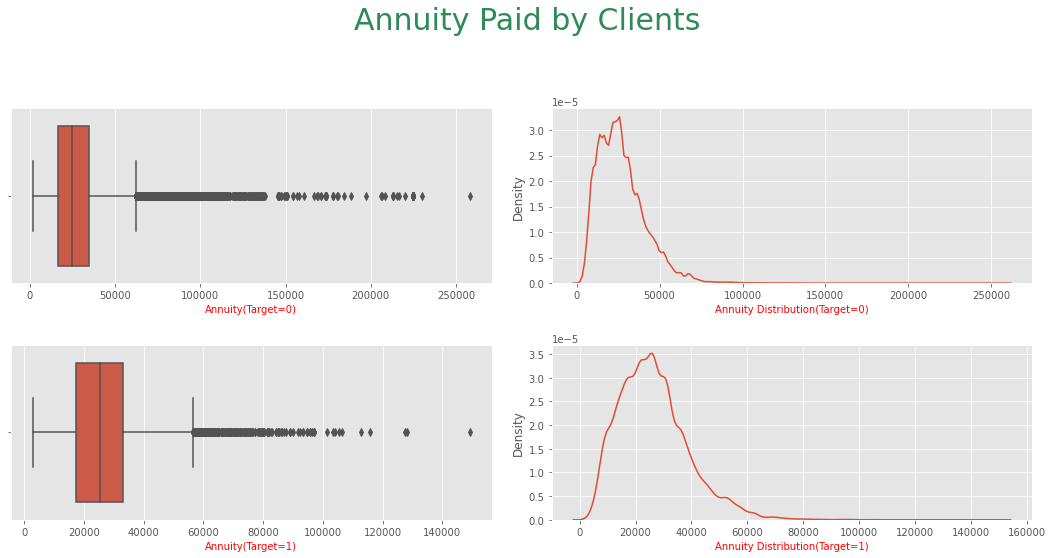

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=[15,8])

plt.gcf().suptitle("Annuity Paid by Clients\n",fontsize=30,color='seagreen')

plt.subplot(2,2,1)
sns.boxplot(target0['AMT_ANNUITY'])
plt.xlabel('Annuity(Target=0)',fontdict={'fontsize':10, 'color':'Red'})
plt.subplot(2,2,2)
sns.distplot(target0['AMT_ANNUITY'], kde=True,hist=False)
plt.xlabel('Annuity Distribution(Target=0)',fontdict={'fontsize':10, 'color':'Red'})

plt.subplot(2,2,3)
sns.boxplot(target1['AMT_ANNUITY'])
plt.xlabel('Annuity(Target=1)',fontdict={'fontsize':10, 'color':'Red'})
plt.subplot(2,2,4)
sns.distplot(target1['AMT_ANNUITY'], kde=True, hist=False)
plt.xlabel('Annuity Distribution(Target=1)',fontdict={'fontsize':10, 'color':'Red'})

plt.tight_layout(pad=2.0)


plt.show()

### Inferences for Target=0

- From the above graphs we can see that the annuity amount have few outliers as the amount increases.
- From the distribution graph we can see that the density lies around less than 50000 among the non defaulters hence, this amount could be the contributing factor for clients to be able to replay their loan on time.

### Inferences for Target=1

- On checking the distribution, it seems that the annnuity amount is in par with the loan disbursed.
- Few annuity amounts are on the higher side and it seems that those are for the people with higher loan amount
- So, once the loan amount is barred until 1000000, there will be an effect on the annuity amount. 
- Also on further checking, it can be seen that the annuity amount saturates at 20 lakhs, so any loans disbursed more than   20 lakhs, annuity remains almost the same and from the distribution of the credit we see that there are numerous credit     that is being disbursed more than 20 Lakhs with an image that the annuity amount is the same.
- As compared to the non-defaulters, annuity amount is more in case of defaulters.

# Univariate(Categorical) Analysis

## Distribution of Organization Type

### For Target=0

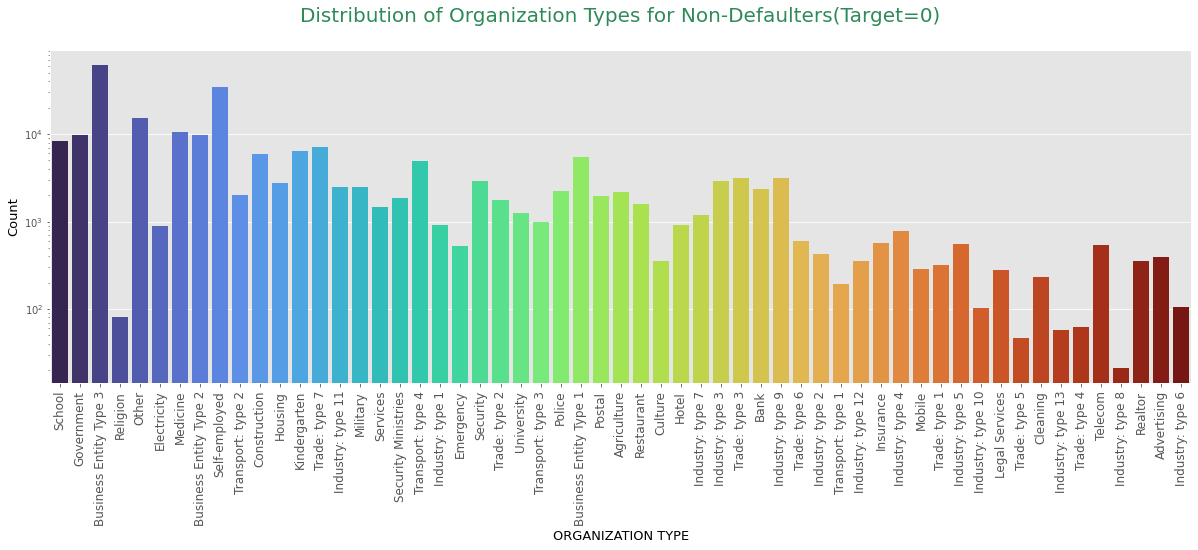

In [63]:
plt.figure(figsize=[17,8])
sns.countplot(target0['ORGANIZATION_TYPE'],palette="turbo" )
plt.title('Distribution of Organization Types for Non-Defaulters(Target=0)\n', fontdict={'fontsize':20, 'color':'Seagreen'})
plt.xlabel('ORGANIZATION TYPE',fontdict={'fontsize':13, 'color':'Black'})
plt.ylabel('Count',fontdict={'fontsize':13, 'color':'Black'})
plt.yscale('log')
plt.xticks(fontsize=12,rotation=90)
plt.tight_layout(pad=2.0)
plt.show()

### Inferences

- From the above distribution of the organization, business entity three appears to be the highest contributor among non- defaulters.
- Industry sectors are taking comparatively lesser loans with respect to the other organization types.
- Self employed people are here taking loans  and they are non-defaulting which eventually signifies that the people over here have some savings to backup incase they do not make enough profits.

### For Target=1

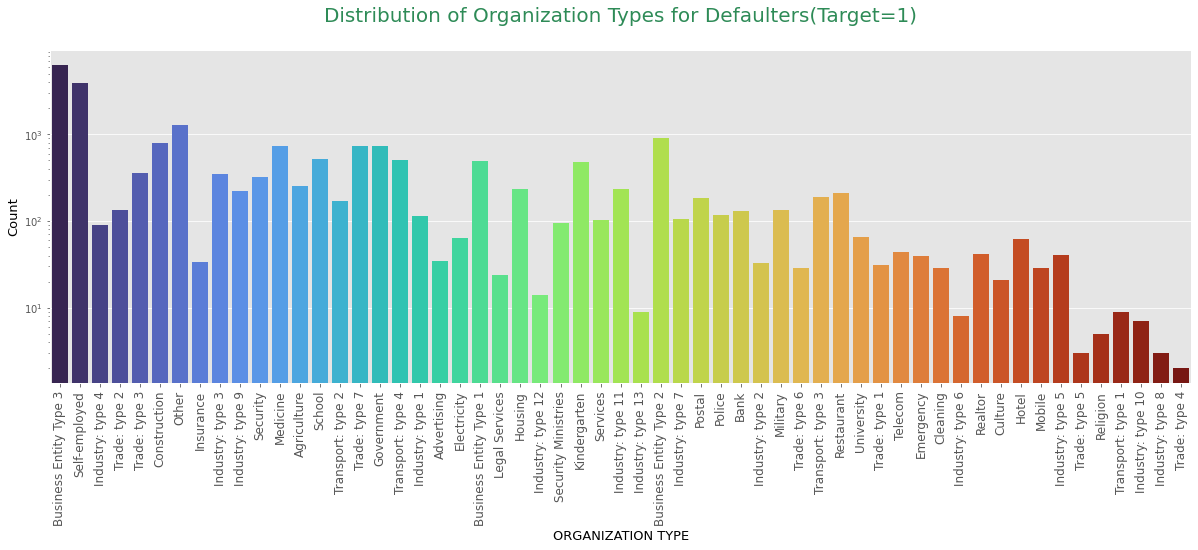

In [64]:
plt.figure(figsize=[17,8])
sns.countplot(target1['ORGANIZATION_TYPE'],palette="turbo" )
plt.title('Distribution of Organization Types for Defaulters(Target=1)\n', fontdict={'fontsize':20, 'color':'Seagreen'})
plt.xlabel('ORGANIZATION TYPE',fontdict={'fontsize':13, 'color':'Black'})
plt.ylabel('Count',fontdict={'fontsize':13, 'color':'Black'})
plt.yscale('log')
plt.xticks(fontsize=12,rotation=90)
plt.tight_layout(pad=2.0)
plt.show()

### Inferences

- From then graph mainly we could see that the top two defaulters are from Business Entity Type 3 and self employed.

- We can also infer from the graph that mostly all the defaulters are from the Business segments or self employed segments, because  the risk associated with money here is higher than the people working in the industries, banks, IT-Sectors and so on.
- Here we are able to see that there is a signficant increase in  the number of industry defaulting in the loan payment.

## Distribution of Contract Type

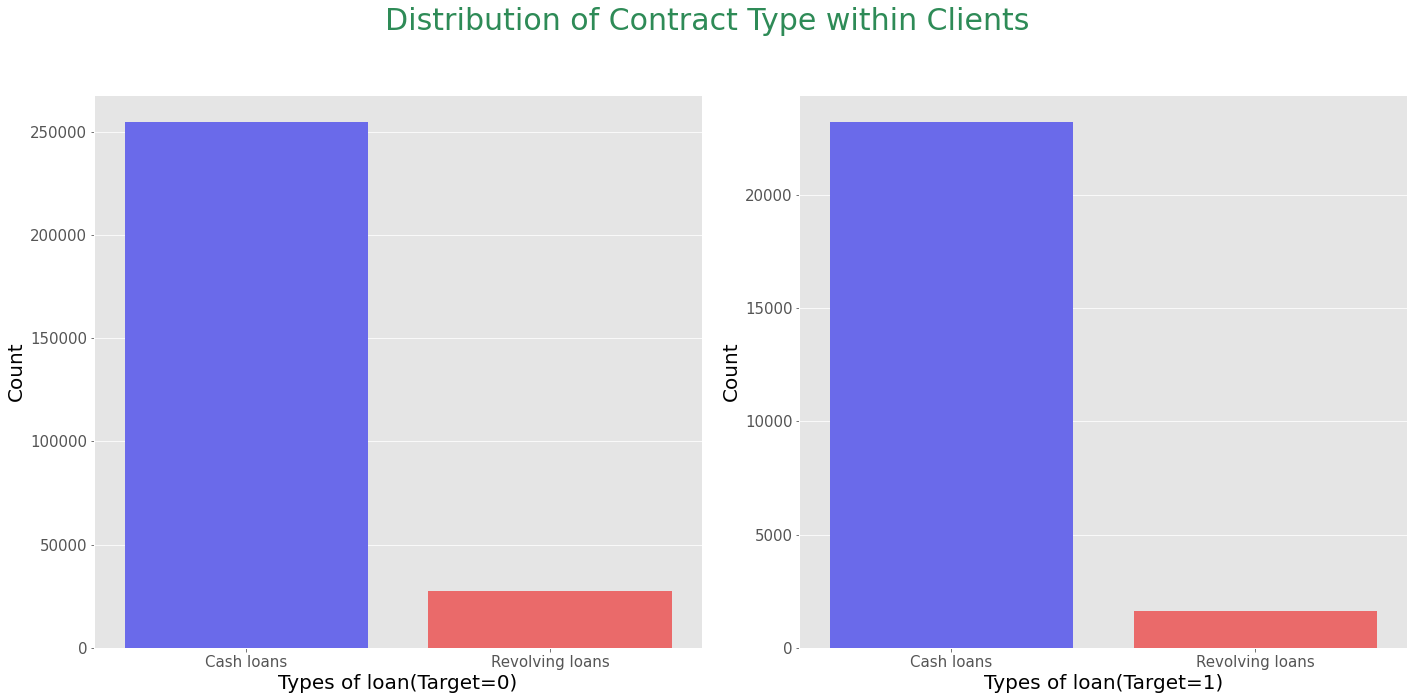

In [65]:
plt.figure(figsize=[20,10])
plt.gcf().suptitle("Distribution of Contract Type within Clients\n",fontsize=30,color='seagreen')
plt.subplot(1,2,1)
sns.countplot(target0['NAME_CONTRACT_TYPE'],palette="seismic" )
plt.xlabel('Types of loan(Target=0)',fontdict={'fontsize':20, 'color':'Black'})
plt.ylabel('Count',fontdict={'fontsize':20, 'color':'Black'})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.subplot(1,2,2)
sns.countplot(target1['NAME_CONTRACT_TYPE'],palette="seismic" )
plt.xlabel('Types of loan(Target=1)',fontdict={'fontsize':20, 'color':'Black'})
plt.ylabel('Count',fontdict={'fontsize':20, 'color':'Black'})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout(pad=2.0)
plt.show()

## Inferences

- Here we can see that mostly people preferred one time cash loan than revolving loans in both the Target segment.
- Might be due to the fact people generally need it for one time use than recurring loans.

## Distribution of Age bucket.

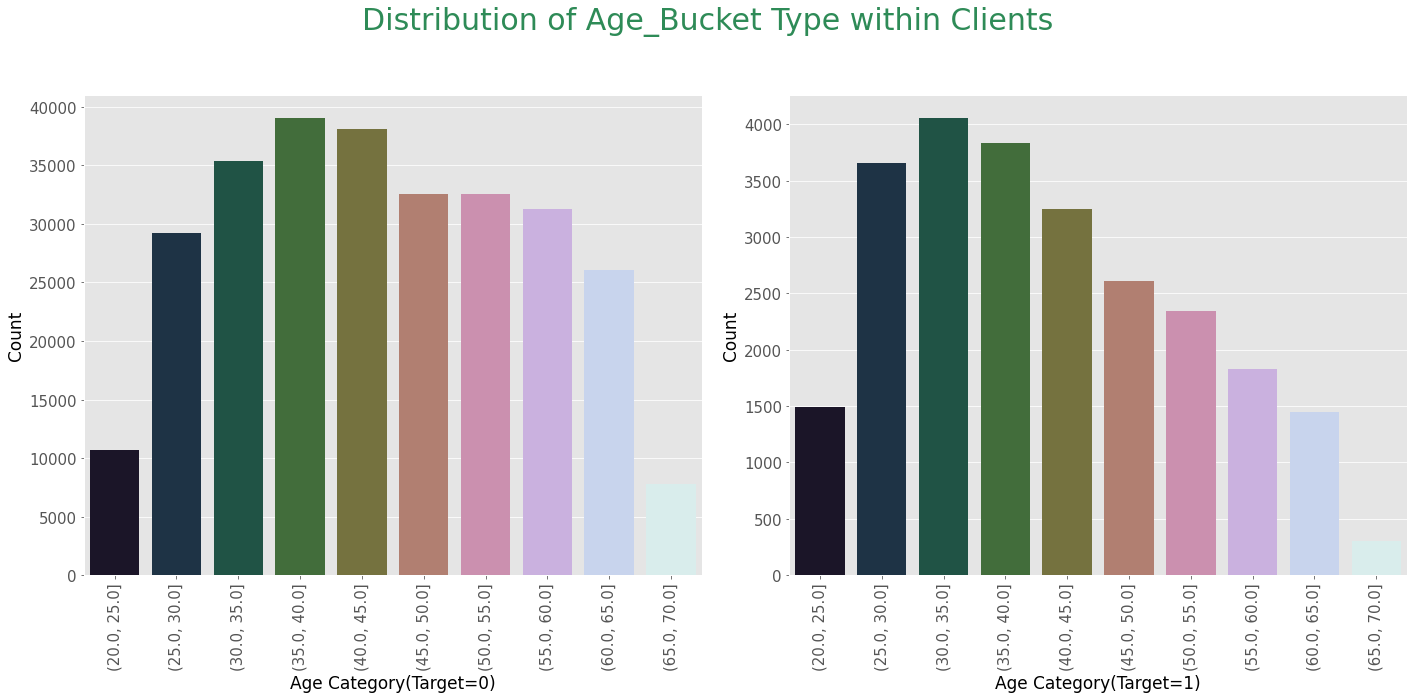

In [66]:
plt.figure(figsize=[20,10])
plt.gcf().suptitle("Distribution of Age_Bucket Type within Clients\n",fontsize=30,color='seagreen')
plt.subplot(1,2,1)
sns.countplot(target0['Age_bucket'],palette="cubehelix" )
plt.xlabel('Age Category(Target=0)',fontdict={'fontsize':17,'color':'Black'})
plt.ylabel('Count',fontdict={'fontsize':17,'color':'Black'})
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
sns.countplot(target1['Age_bucket'],palette="cubehelix" )
plt.xlabel('Age Category(Target=1)',fontdict={'fontsize':17,'color':'Black'})
plt.ylabel('Count',fontdict={'fontsize':17,'color':'Black'})
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)

plt.tight_layout(pad=2.0)
plt.show()

### Inferences for Target=0

- From the above graph we can understand that the age group of 30-55 apply for loans more compared to the rest, given the fact they are already established in their feild and may have family to cater to or to get better education to their children.

### Inferences for Target=1

- We see that the people in the age group 25-40 default mostly than the other age groups.
- It can be inferred as people here start their own business or get married, hence they would need some loan to  back up     their savings.
- As the age bucket increases people, are preferring lesser loans as it can be inferred as they are approaching towards retirement they have limited incoming(pension) and outgoing money and the needs are also limited. 

## Distribution of Credit Bucket.

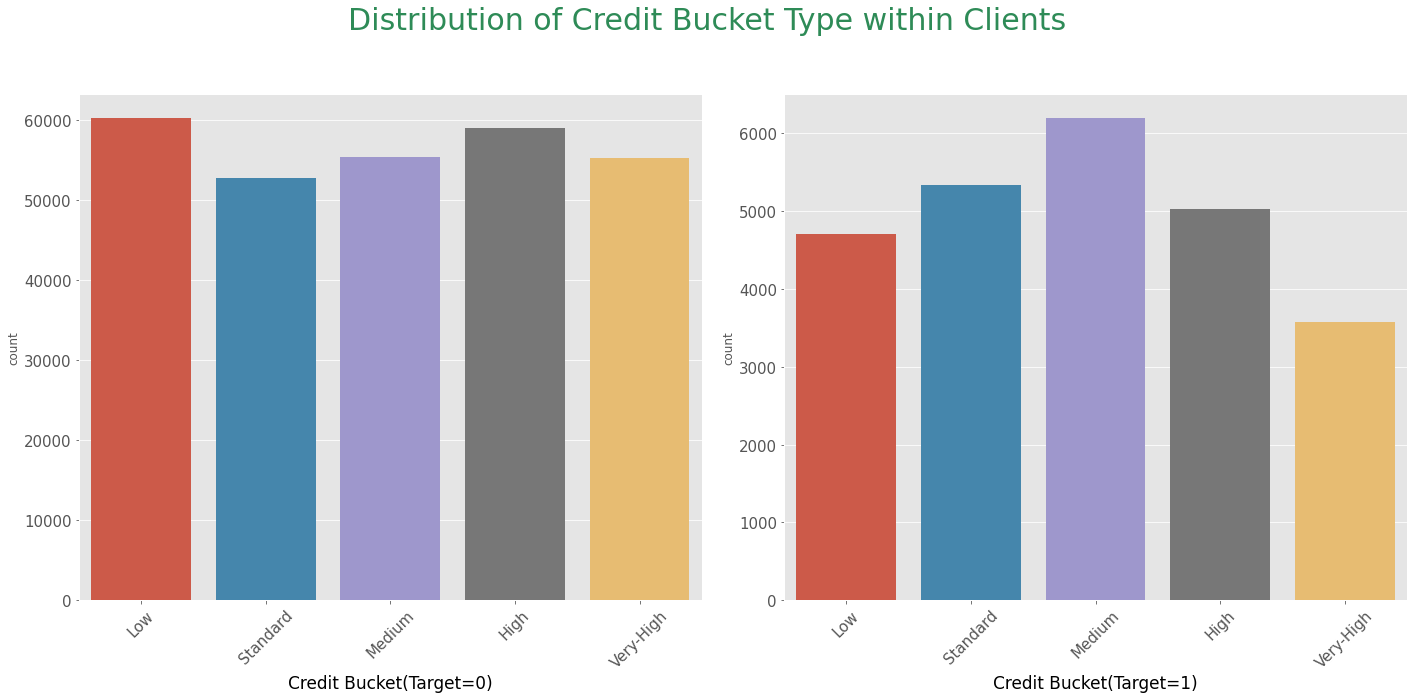

In [67]:
plt.figure(figsize=[20,10])
plt.gcf().suptitle("Distribution of Credit Bucket Type within Clients\n",fontsize=30,color='seagreen')

plt.subplot(1,2,1)
sns.countplot(target0['Credit_bucket'])
plt.xlabel('Credit Bucket(Target=0)',fontdict={'fontsize':17,'color':'Black'})
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
sns.countplot(target1['Credit_bucket'])
plt.xlabel('Credit Bucket(Target=1)',fontdict={'fontsize':17,'color':'Black'})
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)


plt.tight_layout(pad=2.0)
plt.show()

### Inferences for Target=0

- Low and High category credits are being taken the most, but it's okay as long as the money is paid back.

### Inferences for Target=1

- Medium category loans are being preferred here as it could be seen  on further analysis that most blue collar people default as compared to while collar people.

# Segmented Univariate(Categorical) Analysis

### Analysing Income Group with repsect to Gender

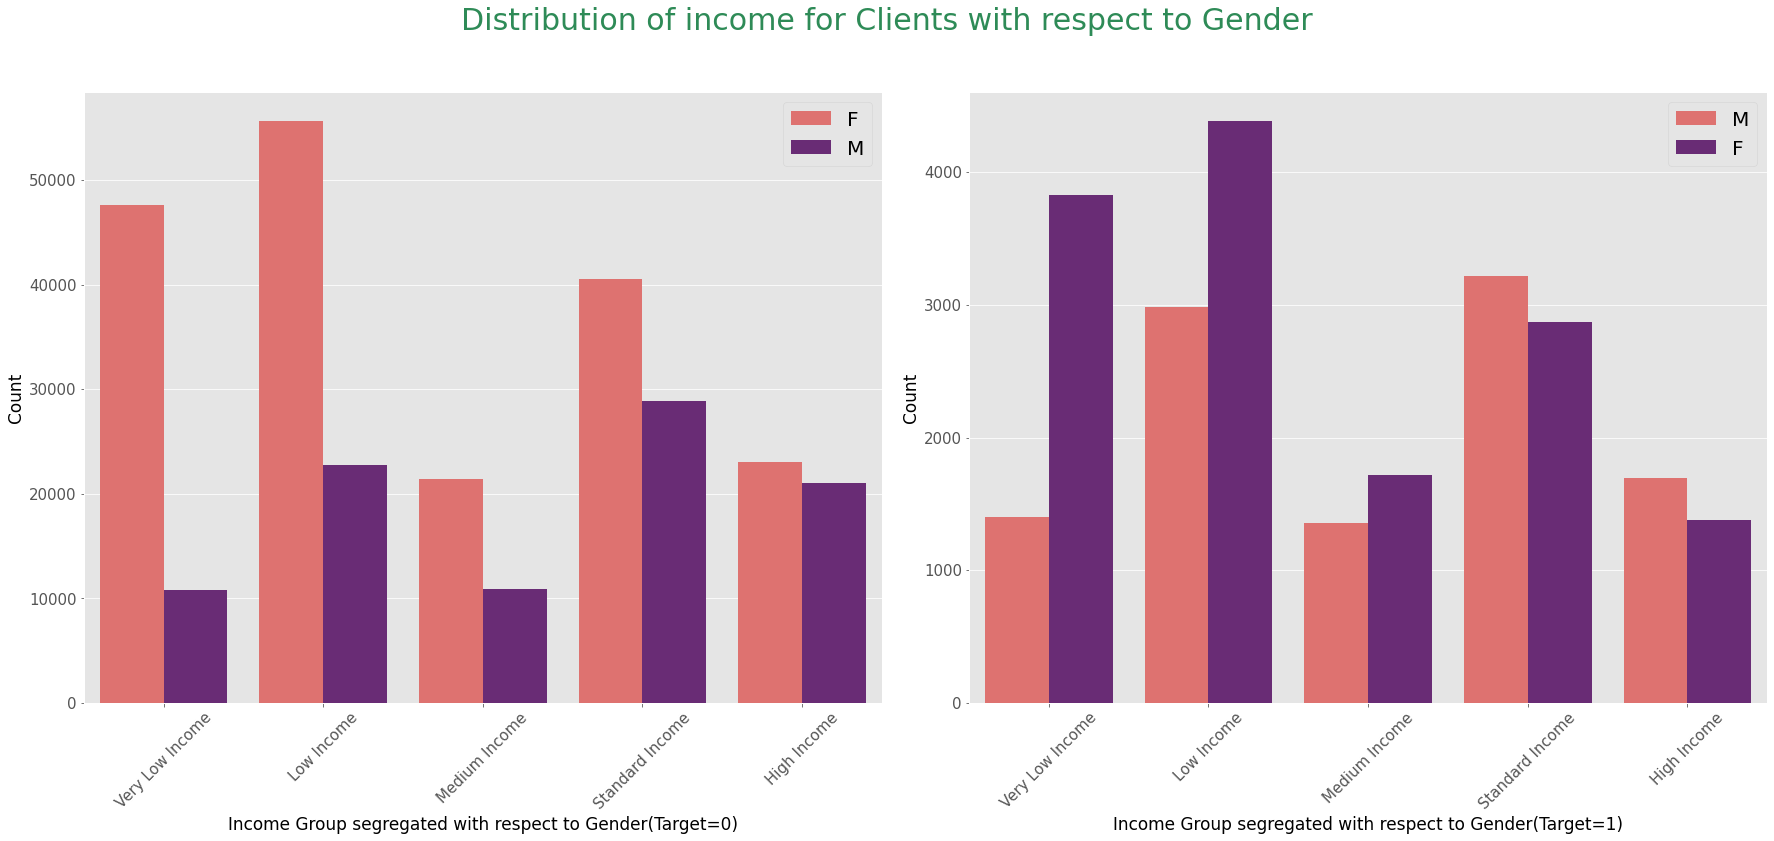

In [68]:
plt.figure(figsize=[25,12])
plt.gcf().suptitle("Distribution of income for Clients with respect to Gender\n",fontsize=30,color='seagreen')
plt.subplot(1,2,1)
sns.countplot(target0['Income_group'],hue=target0['CODE_GENDER'],palette="magma_r")
plt.xlabel('Income Group segregated with respect to Gender(Target=0)', fontdict={'fontsize':17, 'color':'Black'})
plt.ylabel('Count', fontdict={'fontsize':17, 'color':'Black'})
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,loc='upper right')

plt.subplot(1,2,2)
sns.countplot(target1['Income_group'],hue=target1['CODE_GENDER'],palette="magma_r")
plt.xlabel('Income Group segregated with respect to Gender(Target=1)', fontdict={'fontsize':17, 'color':'Black'})
plt.ylabel('Count', fontdict={'fontsize':17, 'color':'Black'})
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,loc='upper right')

plt.tight_layout(pad=2.0)
plt.show()

### Inferences for Target=0

- From the above graph we an analyse that as the number of females are higher, their contribution towars the significant income groups is also higher.
- Females are seen to belong from  low and very low income group while the majority of men come under the standard group among the non-defaulters.

### Inferences for Target=1

- Among the clients who had a default, we see that most of  in the low income group were females followed  by the males
- Groups such as standard and high have more number of males than females and credit taken by other income groups has been comparatively lower than income group as low and very low.
- To be more precise, checking at the above plot, there is a significant difference between female taking credit and a male   taking credit.There may be several reason, like if they are divorced and dependent so they need to manage expenses and so on.

### Analysing Credit Bucket with repsect to Gender

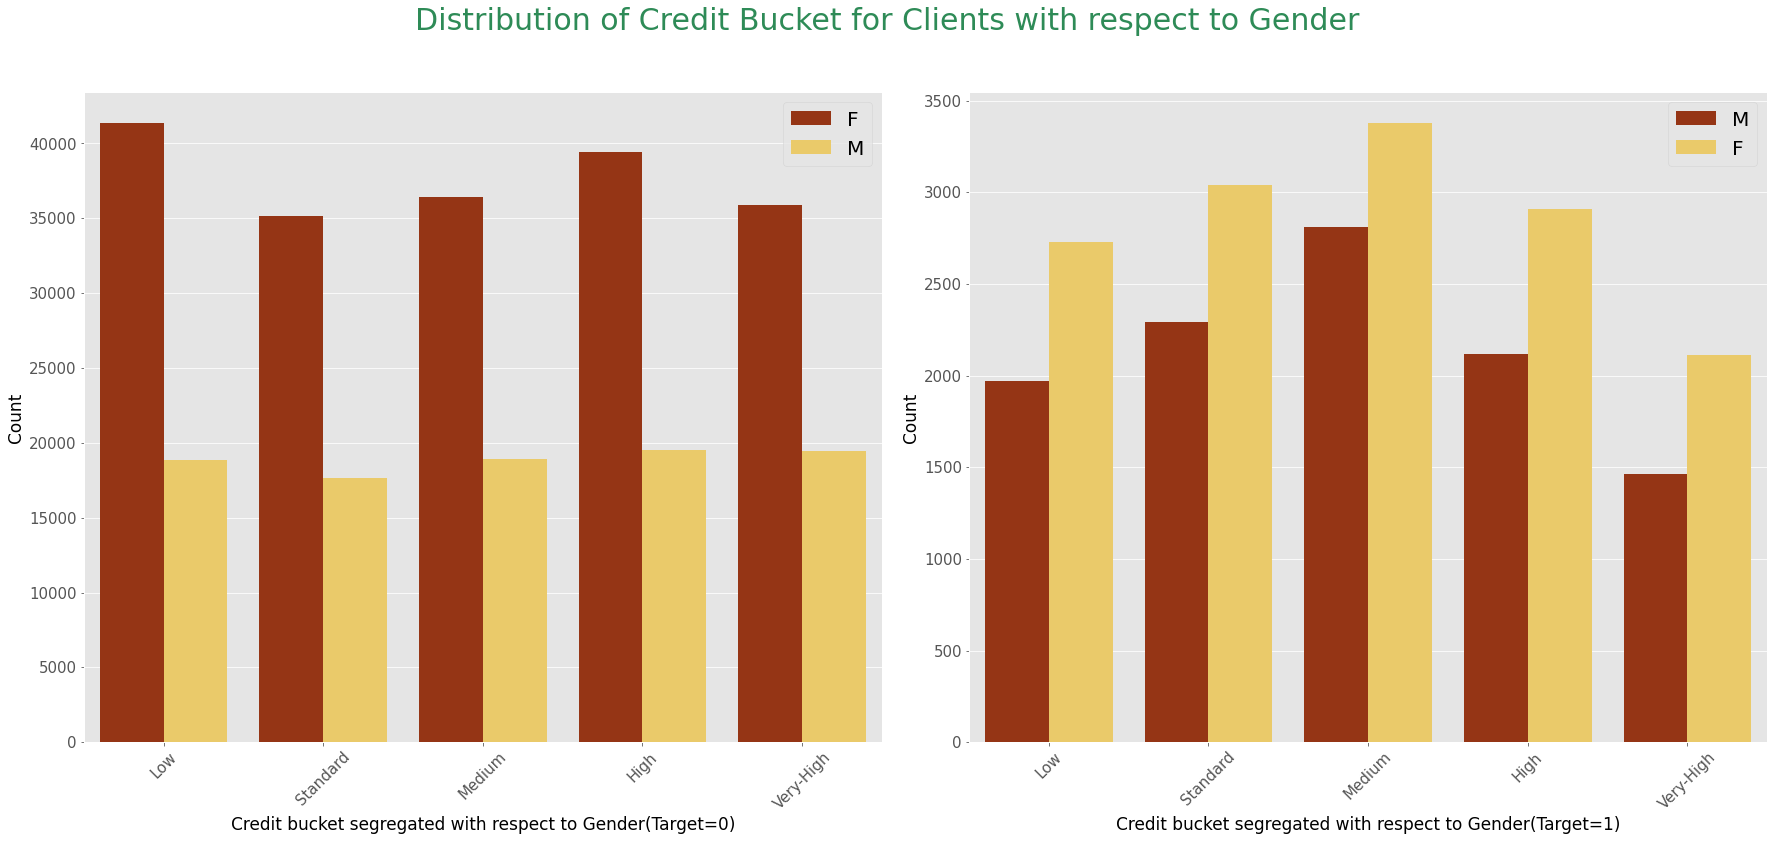

In [69]:
plt.figure(figsize=[25,12])
plt.gcf().suptitle("Distribution of Credit Bucket for Clients with respect to Gender\n",fontsize=30,color='seagreen')
plt.subplot(1,2,1)
sns.countplot(target0['Credit_bucket'],hue=target0['CODE_GENDER'],palette="afmhot")
plt.xlabel('Credit bucket segregated with respect to Gender(Target=0)', fontdict={'fontsize':17, 'color':'Black'})
plt.ylabel('Count', fontdict={'fontsize':17, 'color':'Black'})
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,loc='upper right')

plt.subplot(1,2,2)
sns.countplot(target1['Credit_bucket'],hue=target1['CODE_GENDER'],palette="afmhot")
plt.xlabel('Credit bucket segregated with respect to Gender(Target=1)', fontdict={'fontsize':17, 'color':'Black'})
plt.ylabel('Count', fontdict={'fontsize':17, 'color':'Black'})
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,loc='upper right')

plt.tight_layout(pad=2.0)
plt.show()

### Inferences for Target=0

- From the above graph we can infer that females fall under higher credit bucket compared to the males.
- Low and high credit bucket have a higher count among the non-defaulters

### Inferences for Target=1

- Females are taking most of the loans here as well however, an interesting pattern that could be seen is that females are opting for the Medium category of loans which also eventually signifies that they must be in personal need.
- Males are significantly lower as compared to the females in both the target segment which eventually signifies that they are more stable as compared to female.

### Analysing Education with respect to Gender

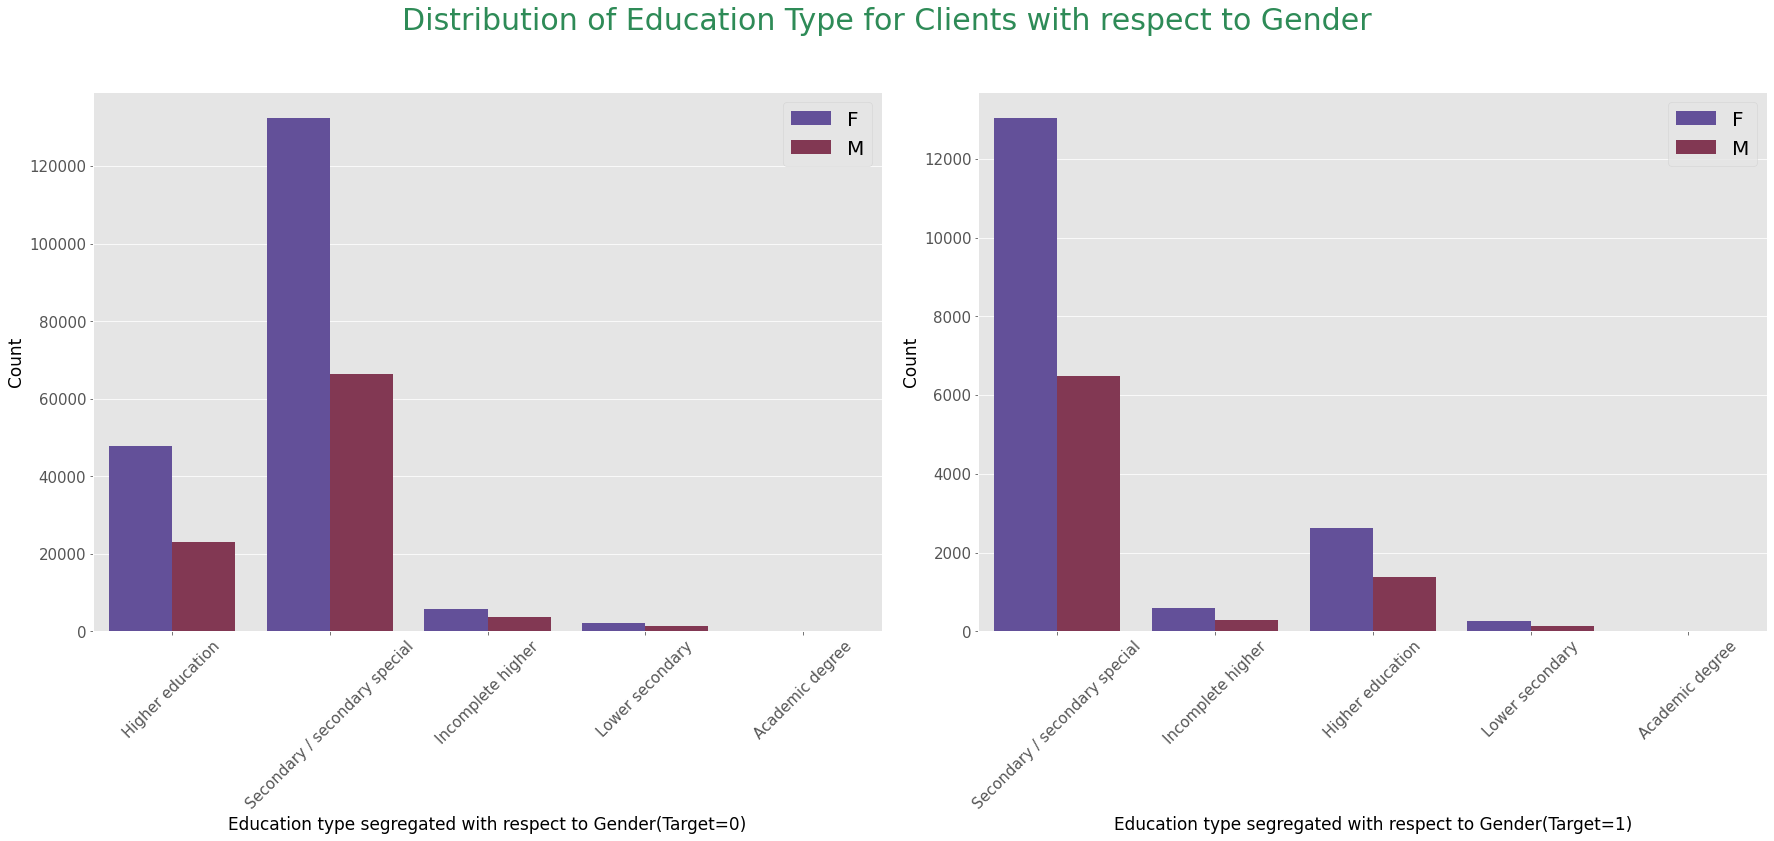

In [70]:
plt.figure(figsize=[25,12])
plt.gcf().suptitle("Distribution of Education Type for Clients with respect to Gender\n",fontsize=30,color='seagreen')

plt.subplot(1,2,1)
sns.countplot(target0['NAME_EDUCATION_TYPE'],hue=target0['CODE_GENDER'],palette="twilight")
plt.xlabel('Education type segregated with respect to Gender(Target=0)', fontdict={'fontsize':17, 'color':'Black'})
plt.ylabel('Count', fontdict={'fontsize':17, 'color':'Black'})
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,loc='upper right')


plt.subplot(1,2,2)
sns.countplot(target1['NAME_EDUCATION_TYPE'],hue=target0['CODE_GENDER'],palette="twilight")
plt.xlabel('Education type segregated with respect to Gender(Target=1)', fontdict={'fontsize':17, 'color':'Black'})
plt.ylabel('Count', fontdict={'fontsize':17, 'color':'Black'})
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,loc='upper right')

plt.tight_layout(pad=2.0)
plt.show()

### Inferences for Target=0

- From the above graph we can observe that females contribute to secondary education count than the males, while the the count is absolutely low for the Academic degree.

- Few of them are highly eudcated.

### Inferences for Target=1

- From the abve graph we  can see that the count of people who were defaulter were majorly from senior secondary which correspondingly means that bank is giving loans to the people without proper education verification as such people are not aware much about these loans and have a high probability of default. On the other hand the education groups are compratively low in counts.
- In comparison  to the other target segment, there are hardly educated people in the Target 1 segment.

### Contract type based distribution with respect to Occupation Type

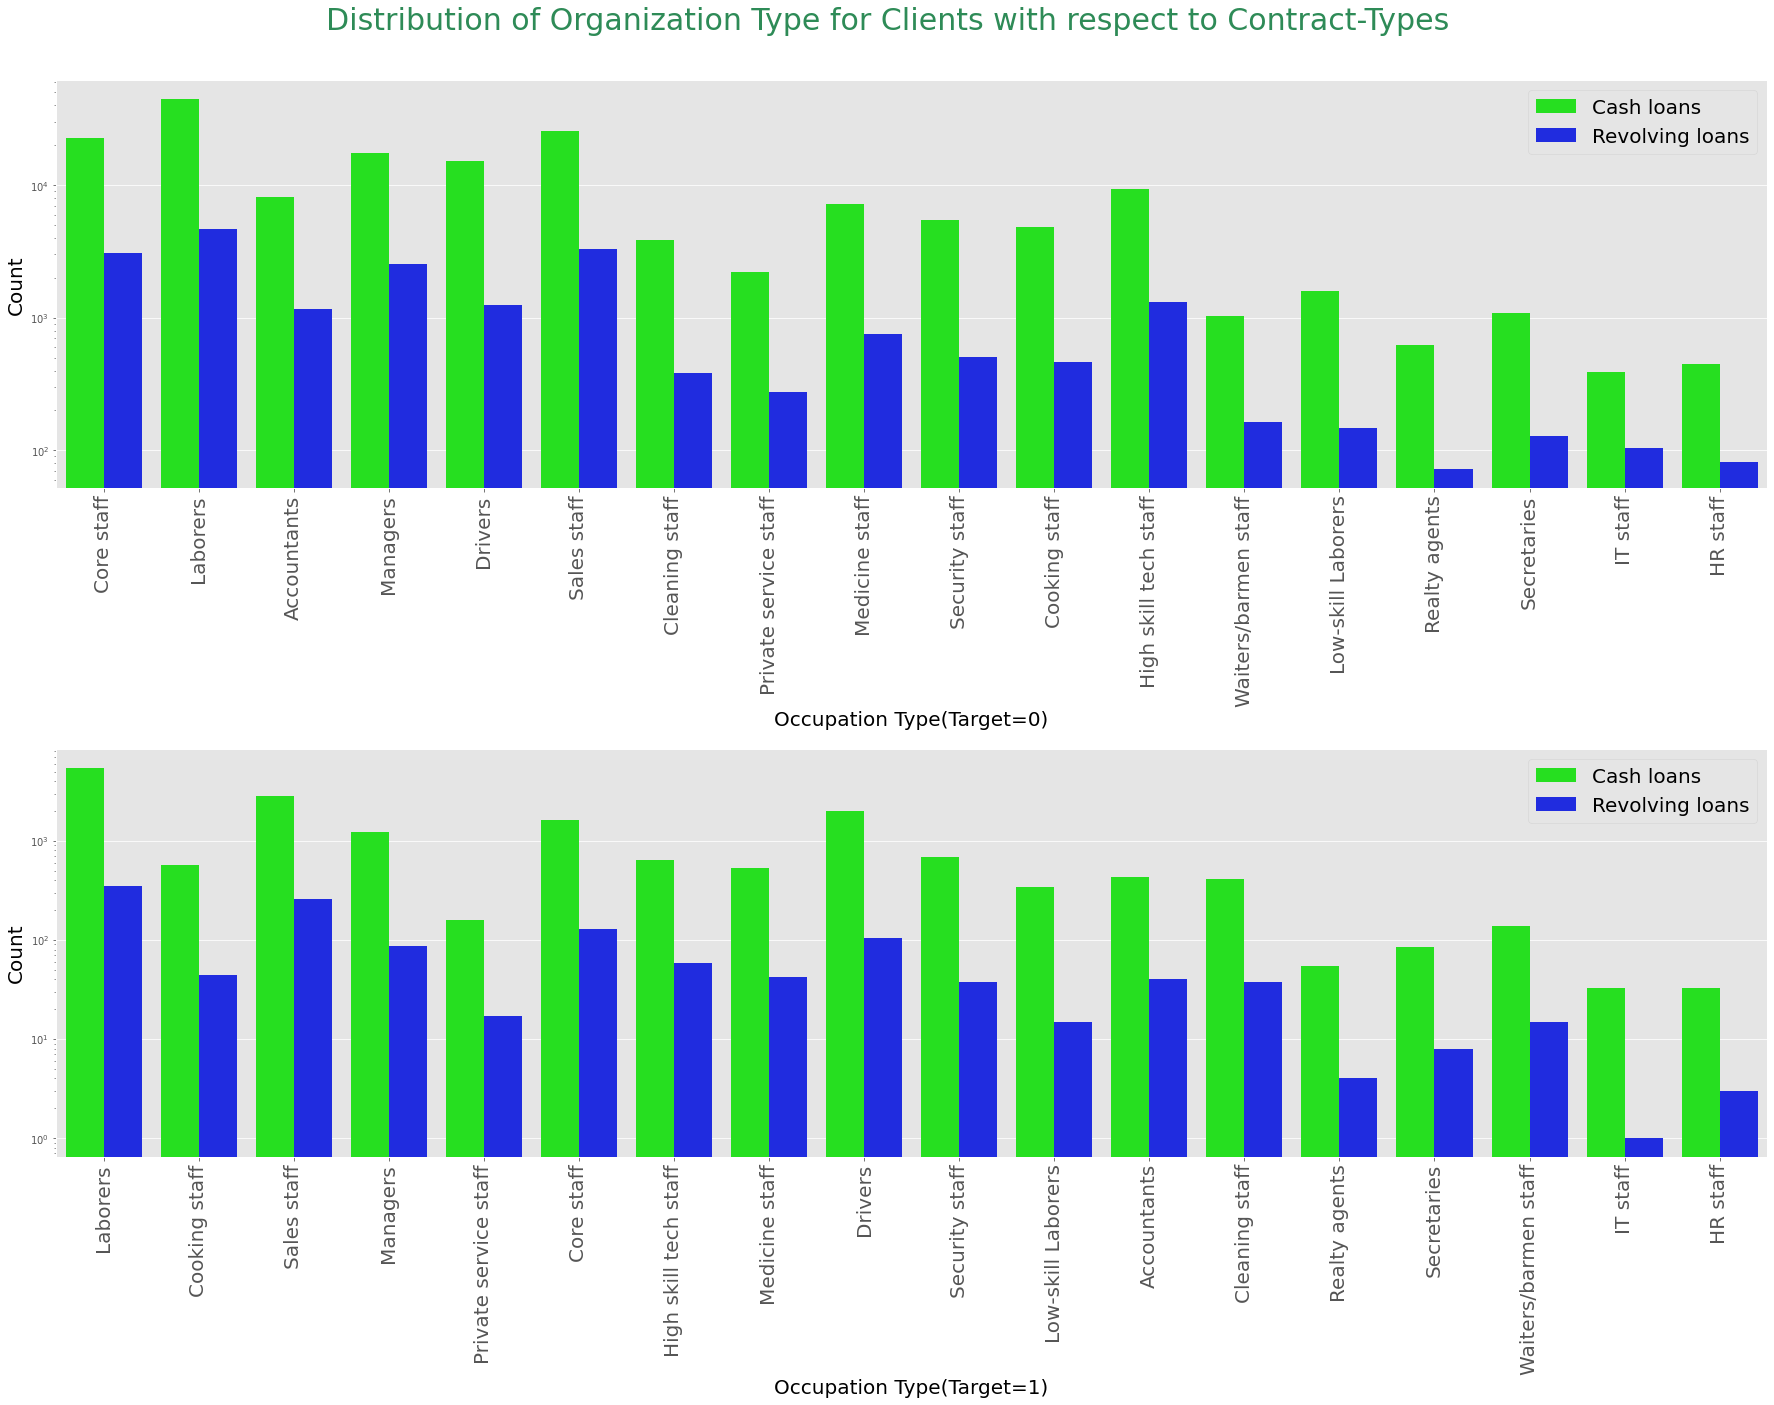

In [71]:
plt.figure(figsize=[25,20])
plt.gcf().suptitle("Distribution of Organization Type for Clients with respect to Contract-Types\n",fontsize=30,color='seagreen')

plt.subplot(2,1,1)
sns.countplot(target0['OCCUPATION_TYPE'], hue= target0['NAME_CONTRACT_TYPE'],palette="hsv")
plt.xticks(fontsize=20, rotation=90)
plt.yscale('log')
plt.ylabel('Count', fontdict={'fontsize':20, 'color':'Black'})
plt.xlabel('Occupation Type(Target=0)', fontdict={'fontsize':20, 'color':'Black'})
plt.legend(fontsize=20)

plt.subplot(2,1,2)
sns.countplot(target1['OCCUPATION_TYPE'], hue= target1['NAME_CONTRACT_TYPE'],palette="hsv")
plt.xticks(fontsize=20,rotation=90)
plt.yscale('log')
plt.ylabel('Count', fontdict={'fontsize':20, 'color':'Black'})
plt.xlabel('Occupation Type(Target=1)', fontdict={'fontsize':20, 'color':'Black'})
plt.legend(fontsize=20)

plt.tight_layout(pad=2.0)
plt.show()

### Inferences for Target=0

- The above graph represents the distribution of occupation and types of loan applied by each. We can see that low income groups such as the labourers apply for more cash loans to have in hand amount and direct payments.
- Cash loans seem to be more prevelent compared to the revolving loans among different occupations.

### Inferences for Target=1

- In this segment white collar people are comparatively taking lesser loans than the blue collar people.
- Here also people prefer Cash loan to Revolving loan.
- Also, revolving loans are much preferred by the blue collar people than the white collar people. This can be innferred as blue collar people need some sort of money coming in as they don't have a fix income as compared to the white collar people.

# Bivariate Analysis(Numerical-Numerical)

### Analysing Income and Credit within clients

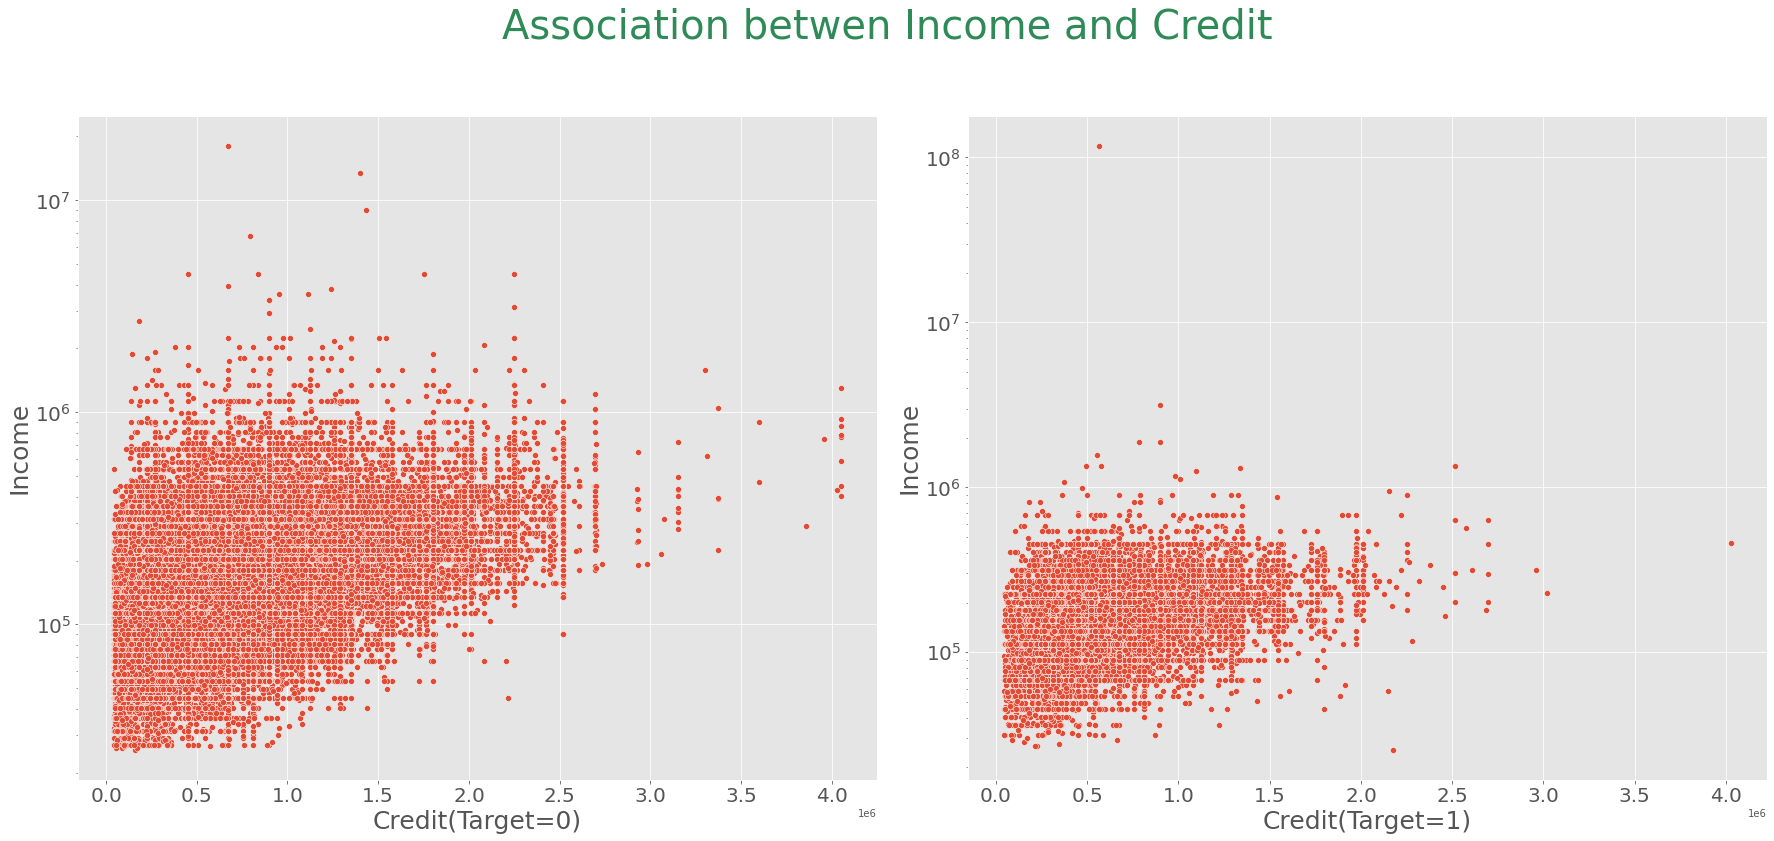

In [72]:
plt.figure(figsize=[25,12])
plt.gcf().suptitle("Association betwen Income and Credit\n",fontsize=40,color='seagreen')
plt.subplot(1,2,1)
sns.scatterplot(target0['AMT_CREDIT'], target0['AMT_INCOME_TOTAL'])
plt.yscale('log')
plt.xlabel('Credit(Target=0)', fontsize=25)
plt.ylabel('Income', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1,2,2)
sns.scatterplot(target1['AMT_CREDIT'], target1['AMT_INCOME_TOTAL'])
plt.yscale('log')
plt.xlabel('Credit(Target=1)', fontsize=25)
plt.ylabel('Income', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout(pad=2.0)
plt.show()

### Inferences for Target=0

- From the above graph we can observe that there is a high correlation between the lower income and credit amount, pertaining to the fact that more loans are applied for with lower income however, the the amount is not very high. It is also seen that very few mid range income non defaulters tends to apply for higher credit.

### Inferences for Target=1

- For this segment, there  is a positive correlation but  that is not very strong, few points can be seen from the graph is bank is disbursing loans with higher credit amount  to the people of same salary range. This may/may not directly relate the risk to be high, but yeah for both Target segments bank should assess the income and then pass loan accordingly. This would not only lower the risk but also lend loans to the people who are actually need the same.

### Analysing Annuity and Credit within clients

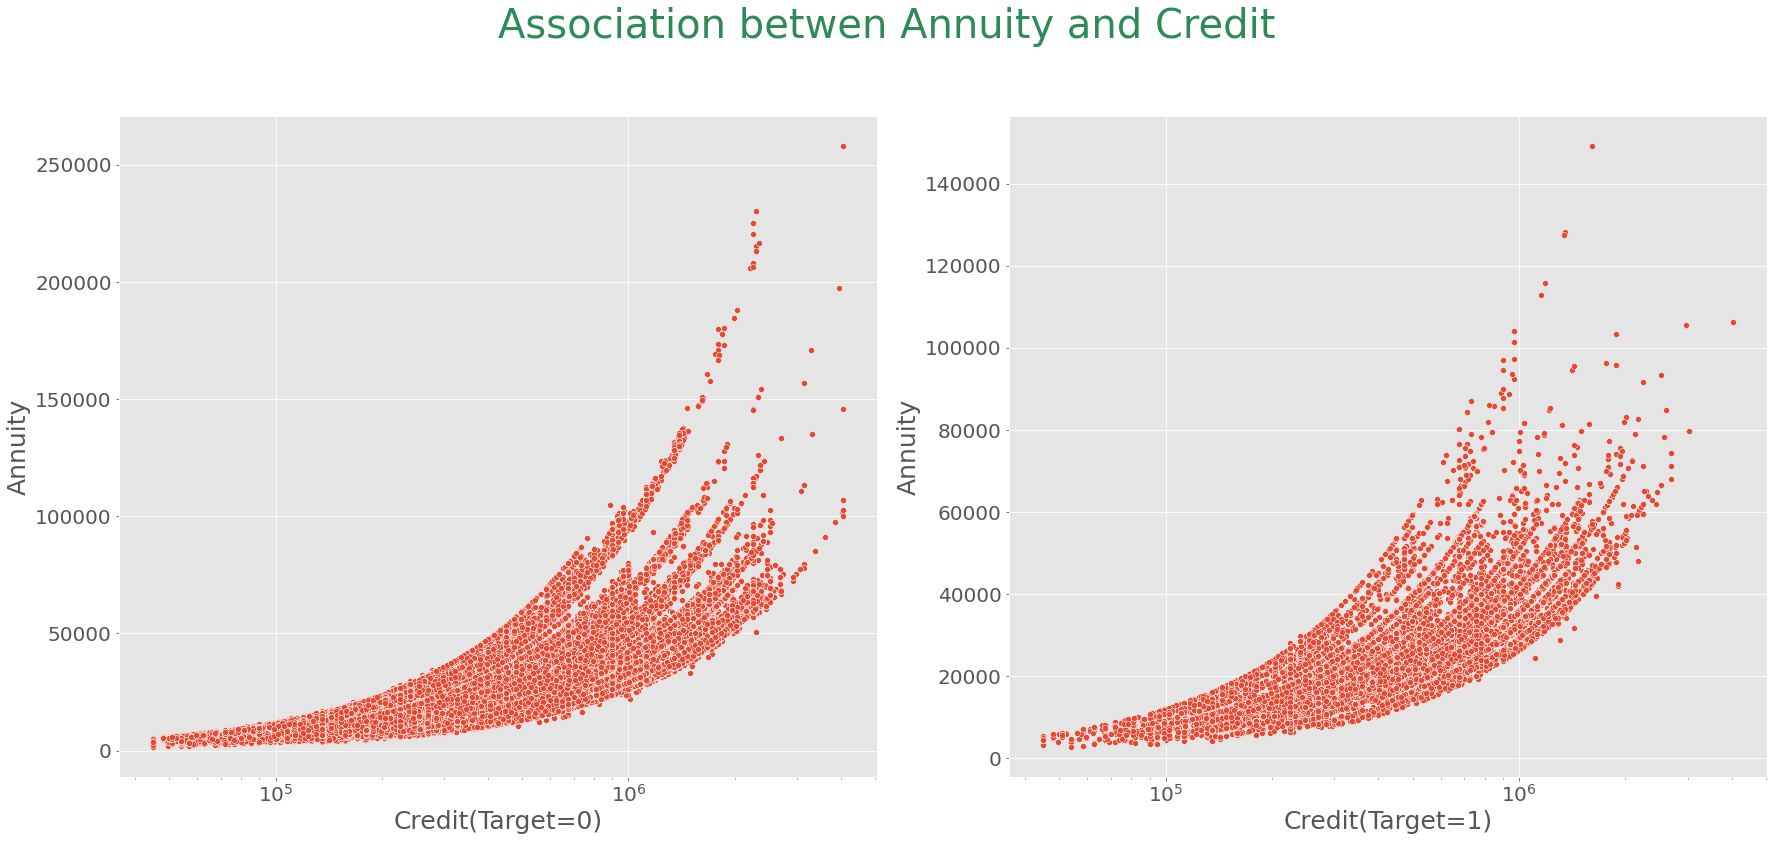

In [73]:
 plt.figure(figsize=[25,12])
plt.gcf().suptitle("Association betwen Annuity and Credit\n",fontsize=40,color='seagreen')
plt.subplot(1,2,1)
sns.scatterplot(target0['AMT_CREDIT'], target0['AMT_ANNUITY'])
plt.xscale('log')
plt.xlabel('Credit(Target=0)', fontsize=25)
plt.ylabel('Annuity', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1,2,2)
sns.scatterplot(target1['AMT_CREDIT'], target1['AMT_ANNUITY'])
plt.xscale('log')
plt.xlabel('Credit(Target=1)', fontsize=25)
plt.ylabel('Annuity', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout(pad=2.0)
plt.show()

### Inferences for Target=0

- From the above graph we can observe that there is a good correlation between Credit amount and annuity. We can infer that as the credit amount goes higher,annuity increases. Here there are few points where the Credit amount is high and the same has been paid back to the bank which eventually signifies the income of the people are better.

### Inferences for Target=1

- From the above graph we can observe that there is a good correlation between Credit amount and annuity. We can infer that as the credit amount goes higher,annuity increases. Here the credit offered to the not that higher as compared to the Target=0 segment but  still the people are facing issues  to pay back the loan which eventually signifies that the income range is not standard.

### Analysing Credit and Price of Goods within clients

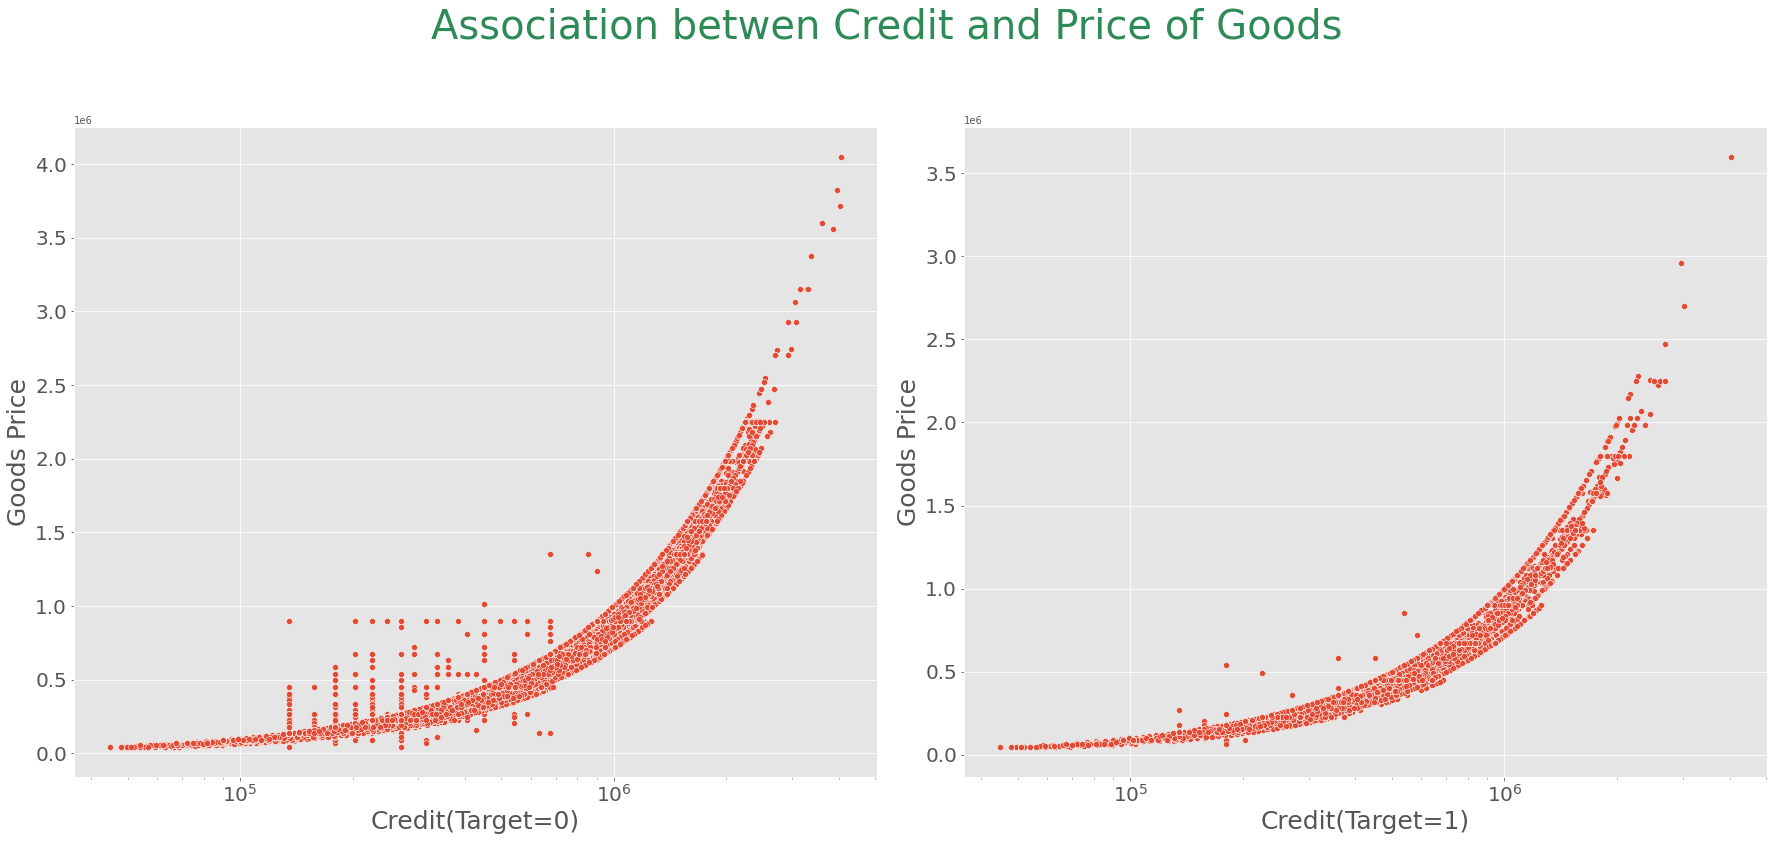

In [74]:
 plt.figure(figsize=[25,12])
plt.gcf().suptitle("Association betwen Credit and Price of Goods\n",fontsize=40,color='seagreen')
plt.subplot(1,2,1)
sns.scatterplot(target0['AMT_CREDIT'], target0['AMT_GOODS_PRICE'])
plt.xscale('log')
plt.xlabel('Credit(Target=0)', fontsize=25)
plt.ylabel('Goods Price', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1,2,2)
sns.scatterplot(target1['AMT_CREDIT'], target1['AMT_GOODS_PRICE'])
plt.xscale('log')
plt.xlabel('Credit(Target=1)', fontsize=25)
plt.ylabel('Goods Price', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout(pad=2.0)
plt.show()

### Inferences for Target=0

- From the above graph we can observe that there is significant correlation between with price of goods and credit. We can infer that as the price of goods increase people take higher credit for it. 

### Inferences for Target=1

- Here there is no such significant difference as compared with the Target=0 segment, the underlying reason remains the same that as  the price increase the credit value increase but there are few points in both the plots that at the same  goods price higher credit is being taken.
 
- In the other segment(Target=0) there is no challenge but in this segment people are failing to pay the loan back, bank should be vigilant about this and saction only the respective amount needed.

# Bivariate Analysis(Categorical-Numerical)

### Distribution of credit with respect to the occupation type

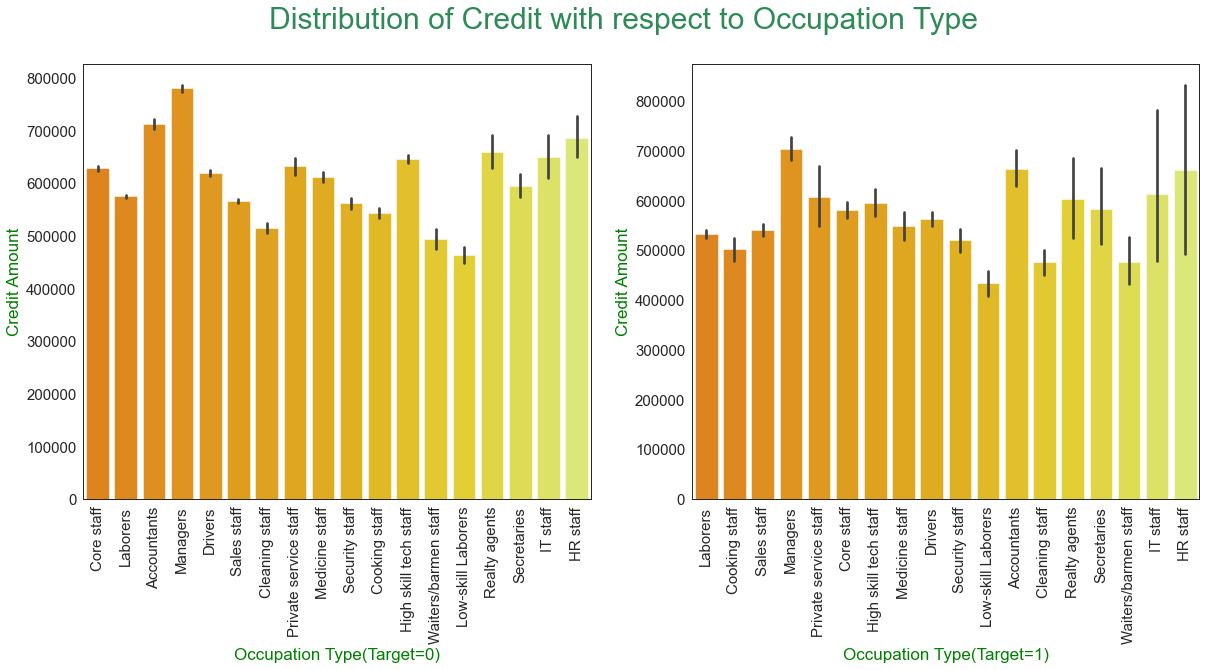

In [75]:
sns.set_style('white')
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.gcf().suptitle("Distribution of Credit with respect to Occupation Type\n\n",fontsize=30,color='seagreen')
sns.barplot(target0['OCCUPATION_TYPE'],target0['AMT_CREDIT'], palette='Wistia_r')
plt.xlabel('Occupation Type(Target=0)',fontdict={'fontsize':17, 'color':'Green'})
plt.ylabel('Credit Amount',fontdict={'fontsize':17, 'color':'Green'})
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
sns.barplot(target1['OCCUPATION_TYPE'],target1['AMT_CREDIT'], palette='Wistia_r')
plt.xlabel('Occupation Type(Target=1)',fontdict={'fontsize':17, 'color':'Green'})
plt.ylabel('Credit Amount',fontdict={'fontsize':17, 'color':'Green'})
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)


plt.show()

### Inferences for Target=0

- From the above graph we can see that managers, accountant, HR staff i.e the white collar occupations have a high credit among non defulters.
- Low skill labourers, cleaning staff i.e blue collar occupations have a low credit among non-defaulters.

### Inferences for Target=1

- The above graph tells us that mostly managers pick up loan from the bank, followed by HR staff and then accountants.
- As it is seen that bank is lenient while disbursing loans to maximum of applicants, we can see that people coming     under the labourers, cooking staff and many other occupation where job is not secured, loans are being disbursed between   on an average 4-5 lakhs.

### Distribution of Income with respect to the Age bucket

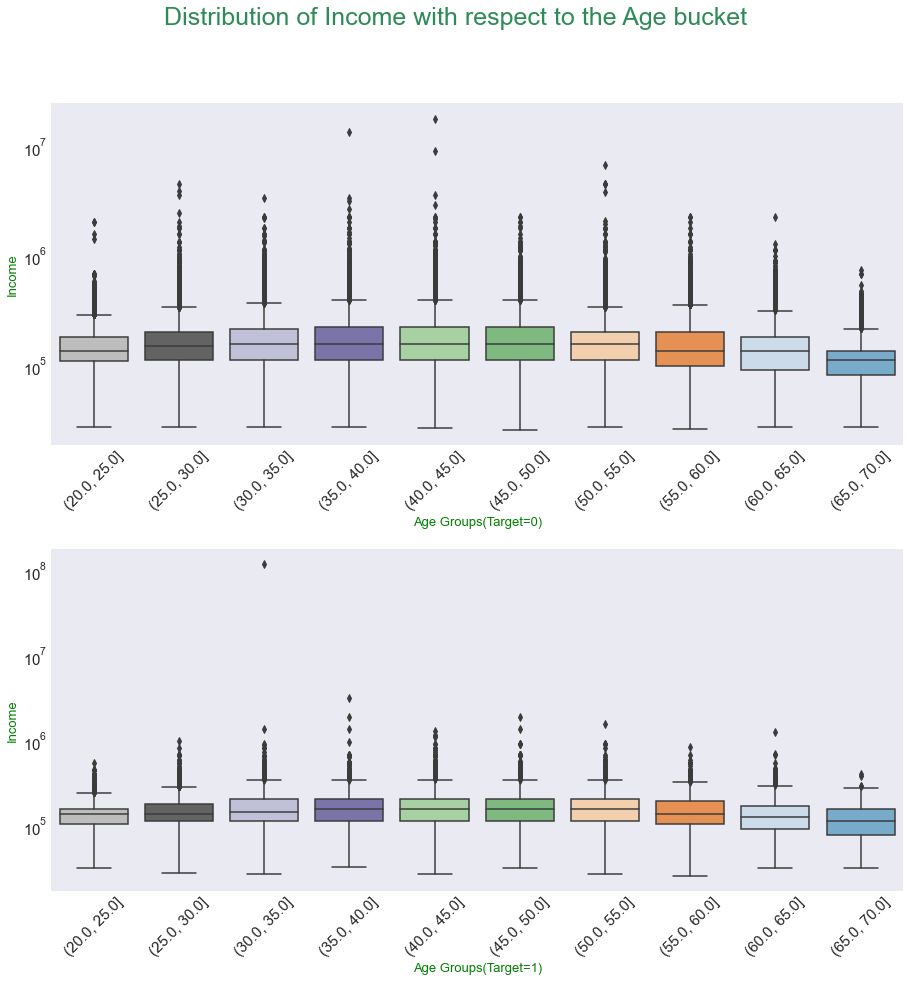

In [76]:
plt.style.use('seaborn-dark')
plt.figure(figsize=[13,14])
plt.gcf().suptitle("Distribution of Income with respect to the Age bucket\n\n",fontsize=25,color='seagreen')
plt.subplot(2,1,1)
sns.boxplot(target0['Age_bucket'],target0['AMT_INCOME_TOTAL'], palette='tab20c_r')
plt.yscale('log')
plt.xlabel('Age Groups(Target=0)',fontdict={'fontsize':13, 'color':'Green'})
plt.ylabel('Income',fontdict={'fontsize':13, 'color':'Green'})
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)

plt.subplot(2,1,2)
sns.boxplot(target1['Age_bucket'],target1['AMT_INCOME_TOTAL'], palette='tab20c_r')
plt.yscale('log')
plt.xlabel('Age Groups(Target=1)',fontdict={'fontsize':13, 'color':'Green'})
plt.ylabel('Income',fontdict={'fontsize':13, 'color':'Green'})
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)


plt.tight_layout(pad=2.0)
plt.show()

### Inferences for Target=0

- From the above graph we can observe that the middle aged have a similar median compared to the aged.
- The age group ranging from 30 to 50 have a stable income.
- The median of younger age group isn’t quite far from the middle aged hence, this indicates that very few people in the age group of 20-30 have already establish themselves to repay their loans timely.


### Inferences for Target=1

- From this we are able to figure out that the median salary of each age bucket is almost the same.
- The maximum income is drawn by the people in the age group 30 to 40 and if we relate this to the distribution of the age   bucket in the target1 dataframe, we would see that this is the bucket where the people are defaulting the most.
- So, from what can be understood this, people might be tweaking their income proof for the loans to be sanctioned.

# Multivariate Analysis

### Analysis of Education vs Credit amount with respect to income groups for Target=0

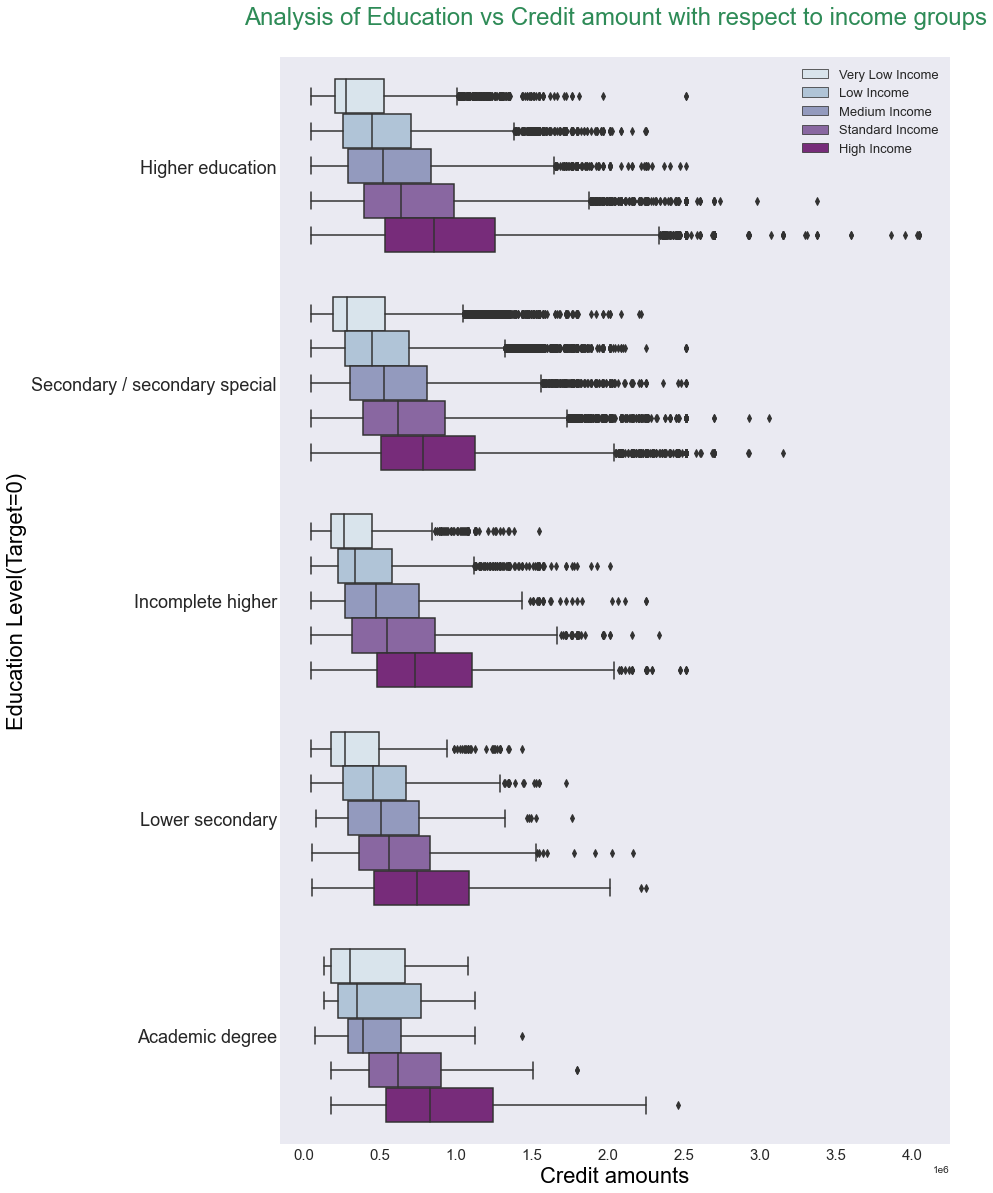

In [77]:
plt.figure(figsize=[12,20])
sns.boxplot(data = target0, x = 'AMT_CREDIT', y= 'NAME_EDUCATION_TYPE', hue= 'Income_group', orient='h', palette="BuPu")
plt.legend(fontsize=13)
plt.xticks(rotation=0,fontsize=15)
plt.xlabel('\nEducation Type', fontsize=20)
plt.title('Analysis of Education vs Credit amount with respect to income groups\n', fontdict={'fontsize':24, 'color':'Seagreen'})
plt.xlabel('Credit amounts', fontdict={'fontsize':22, 'color':'Black'})
plt.ylabel('Education Level(Target=0)', fontdict={'fontsize':22, 'color':'Black'})
plt.yticks(fontsize=18)
plt.show()

### Inferences for Target=0

- From the above graph we can find a relationship between the selected parametrs among the non defaulters. Firstly we can observe that there is a median shift towards a greater value with the level of education with respect to the income group i.e higher the level of education the median shifts towards higher value for the increasing income group. 
- People with Academic degrees tend to have higher income although there are few people with mediun income bracket applying for lesser credit amounts.
- With the increase in education and income level the credit amount increases hence more loans can be provided to such category

### Analysis of Education vs Credit amount with respect to income groups for Target=1

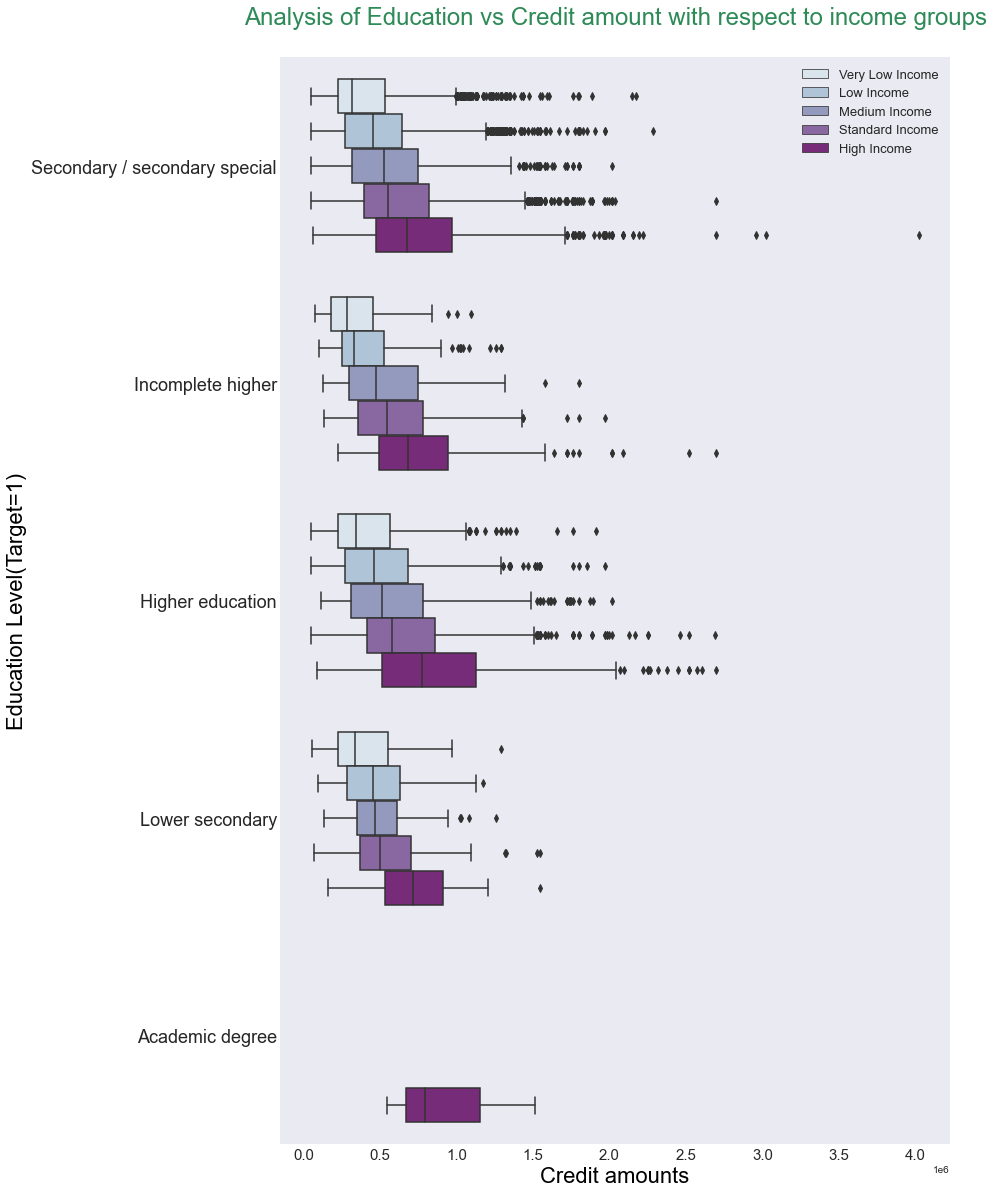

In [78]:
plt.figure(figsize=[12,20])
sns.boxplot(data = target1, x = 'AMT_CREDIT', y= 'NAME_EDUCATION_TYPE', hue= 'Income_group', orient='h', palette="BuPu")
plt.legend(fontsize=13)
plt.xticks(rotation=0,fontsize=15)
plt.xlabel('\nEducation Type', fontsize=20)
plt.title('Analysis of Education vs Credit amount with respect to income groups\n', fontdict={'fontsize':24, 'color':'Seagreen'})
plt.xlabel('Credit amounts', fontdict={'fontsize':22, 'color':'Black'})
plt.ylabel('Education Level(Target=1)', fontdict={'fontsize':22, 'color':'Black'})
plt.yticks(fontsize=18)
plt.show()

### Inferences for Target=1

- People in senior secondary seems to take more credit  as compared to any other education level.
- It is seen that as te education level increases the credit amount decrease, we an see this pattern in the Target=1 segment, only peolpe in  the high income group have opted for loan and the credit amount is lower as compared to all other groups.
- This can be inferred, educated people  are less in number in Target=1 segment and hence, the highest degree people seems to very stable and opts for lower credit and it might happen that due to unsual circumstances the loan got defaulted.

### Analysis of Education vs Credit amount with respect to contact types

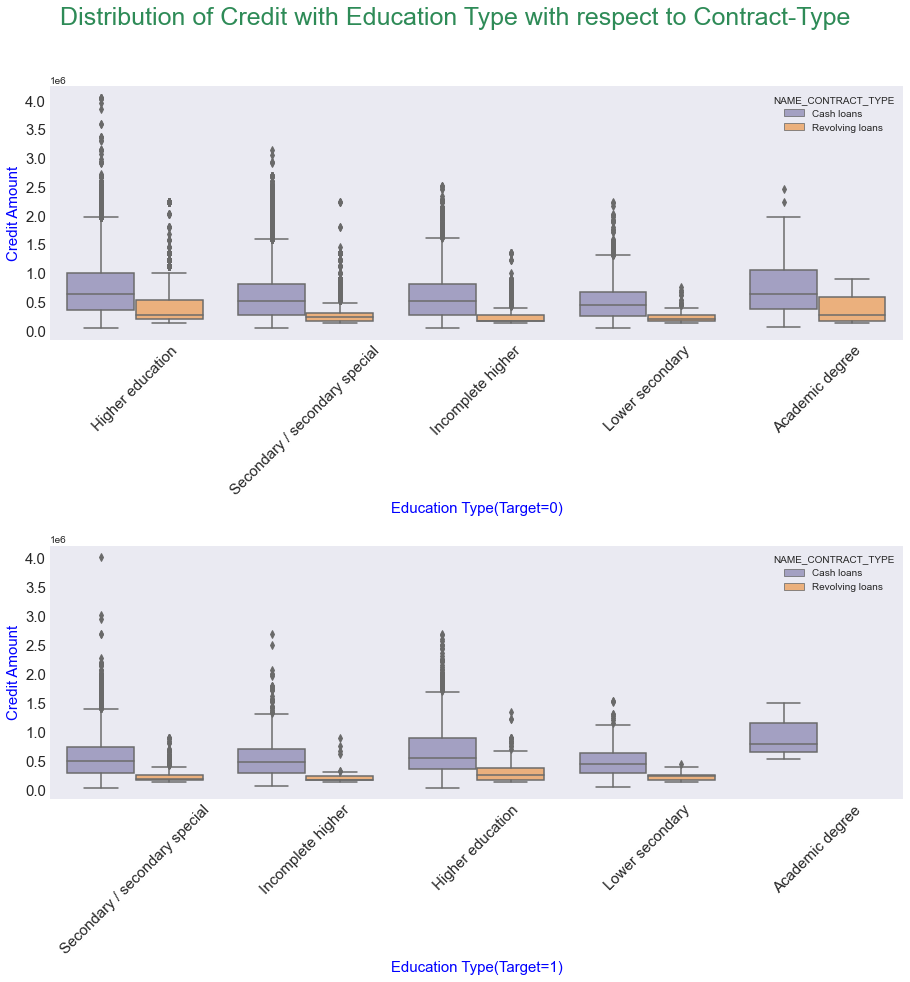

In [79]:
plt.style.use('seaborn-muted')
plt.figure(figsize=[13,14])
plt.gcf().suptitle("Distribution of Credit with Education Type with respect to Contract-Type\n",fontsize=25,color='seagreen')

plt.subplot(2,1,1)
sns.boxplot(target0['NAME_EDUCATION_TYPE'],target0['AMT_CREDIT'],hue=target0['NAME_CONTRACT_TYPE'],palette='tab20c_r')
plt.xlabel('Education Type(Target=0)',fontdict={'fontsize':15, 'color':'Blue'})
plt.ylabel('Credit Amount',fontdict={'fontsize':15, 'color':'Blue'})
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)

plt.subplot(2,1,2)
sns.boxplot(target1['NAME_EDUCATION_TYPE'],target1['AMT_CREDIT'],hue=target1['NAME_CONTRACT_TYPE'],palette='tab20c_r')
plt.xlabel('Education Type(Target=1)',fontdict={'fontsize':15, 'color':'Blue'})
plt.ylabel('Credit Amount',fontdict={'fontsize':15, 'color':'Blue'})
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)


plt.tight_layout(pad=2.0)
plt.show()

### Inferences for Target=0

- It can be observed from the above graph that cash loan is way more prevalent compared to revolving loans.
- We can also observe that among the non-defaulters with higher level of education tend to opt for more cash loans and revolving loans compared to the others.
- The non deafulters among the lower levels of education apply less for revolving loans pertaining to the fact that they may belong to lower income group and may not be aware about the benifits of revolving loans.

### Inferences for Target=1

- We see that clients are opting for the  cash loans more than revolving loans  in all the 5 categories.

- Among them, Secondary/Secondary Special have been disbursed higher loans despite being from the lowest education           category.This clearly  signifies that bank is lenient on providing loans and or might be to make the sale it has           processed the loan, so risk has been taken.

# Defining Correlation

## Correlation for Target=0

In [80]:
target0_corr = target0.iloc[0:, 2:].corr()
target0_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  Years_Birth
CNT_CHILDREN                     1.000000          0.027397    0.003081     0.020905        -0.000525   -0.336966      -0.245174          -0.185792         0.028751         0.878571              0.022842                     0.021866                   -0.000432                   0.000648                   -0.001632                  -0.010455                  -0.007087                   -0.042547    -0.336966
AMT_INCOME_TOTAL                 0.027397          1.000000    0.342799     0.418953         0.349462   -0.062609      -0.140392          -0.064937        -0.022896         0.034256             -0.186573                    -0.200466                    0.001417                   0.007862                    0.006234                   0.061470                   0.013128                    0.029536    -0.062609
AMT_CREDIT                       0.003081          0.342799    1.000000     0.771309         0.987250    0.047378      -0.070104          -0.013477         0.001464         0.064536             -0.103337                    -0.112238                   -0.003734                   0.004409                   -0.001883                   0.054071                   0.017767                   -0.048866     0.047378
AMT_ANNUITY                      0.020905          0.418953    0.771309     1.000000         0.776686   -0.012263      -0.104978          -0.039436        -0.014113         0.075787             -0.132128                    -0.145153                    0.003148                   0.002392                    0.012681                   0.038181                   0.011248                   -0.010882    -0.012263
AMT_GOODS_PRICE                 -0.000525          0.349462    0.987250     0.776686         1.000000    0.044565      -0.068609          -0.015916         0.003649         0.062814             -0.104382                    -0.112601                   -0.003116                   0.004820                   -0.001597                   0.055850                   0.018163                   -0.051266     0.044565
DAYS_BIRTH                      -0.336966         -0.062609    0.047378    -0.012263         0.044565    1.000000       0.626114           0.333151         0.271314        -0.285825             -0.002332                    -0.000780                   -0.004461                  -0.002772                    0.001069                  -0.002855                   0.011335                    0.072886     1.000000
DAYS_EMPLOYED                   -0.245174         -0.140392   -0.070104    -0.104978        -0.068609    0.626114       1.000000           0.214511         0.276663        -0.238301              0.038328                     0.040461                   -0.004460                  -0.000874                    0.002223                  -0.034890                   0.015116                    0.052169     0.626114
DAYS_REGISTRATION               -0.185792         -0.064937   -0.013477    -0.039436        -0.015916    0.333151       0.214511           1.000000         0.100236        -0.175630             -0.075846                    -0.069357                    0.002730                   0.000035                    0.001431                   0.011857                   0.000527                    0.026639     0.333151
DAYS_ID_PUBLISH                  0.028751         -0.022896    0.001464    -0.014113         0.003649    0.271314       0.276663           0.100236         1.000000         0.020460              0.008998                     0.011734                   -0.004797                   0.000198                    0.001655               

### Plotting the matrix

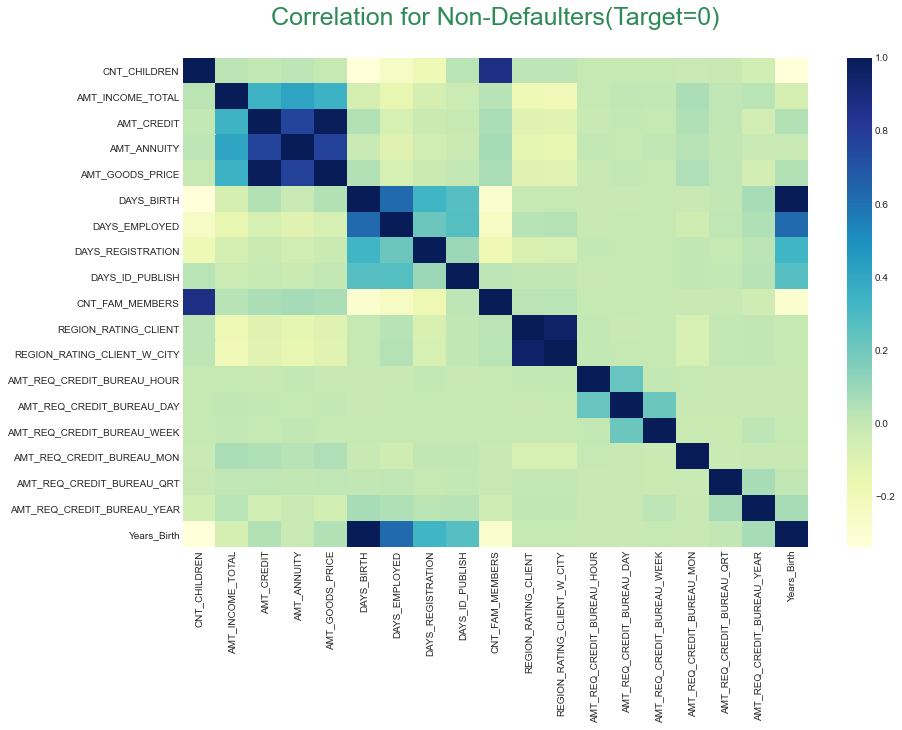

In [81]:
plt.figure(figsize=[14,9])
sns.heatmap(target0_corr, annot=False, cmap='YlGnBu')
plt.title('Correlation for Non-Defaulters(Target=0)\n', fontsize=25,color='Seagreen')
plt.show()

### Inferences for Target=0

- The above heat map shows the the correlation among the parameters for the non defaulters.
- We can observe that there is a high correlation between income, credit and annuity as all these three parameters are interdependable and linearly related to each other.
- We can also see the high correlation between days employed and birth year stating that work experience increases with age.
- We also see a high correlation family member count and number of children. From this we can understand that family comprise more of children.
- We can also observe that the region rating per client also have a high correlation given the fact that the clients are segregated well region wise and rated accordingly hence, it is an organised approach.

## Bottom 10 Correlation for Target=0

In [82]:
corr0 = target0_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr0 = corr0[corr0 != 1.0]
corr0.head(10)

AMT_REQ_CREDIT_BUREAU_DAY   DAYS_REGISTRATION             0.000035
DAYS_REGISTRATION           AMT_REQ_CREDIT_BUREAU_DAY     0.000035
AMT_REQ_CREDIT_BUREAU_DAY   CNT_FAM_MEMBERS               0.000181
CNT_FAM_MEMBERS             AMT_REQ_CREDIT_BUREAU_DAY     0.000181
AMT_REQ_CREDIT_BUREAU_DAY   DAYS_ID_PUBLISH               0.000198
DAYS_ID_PUBLISH             AMT_REQ_CREDIT_BUREAU_DAY     0.000198
AMT_REQ_CREDIT_BUREAU_WEEK  CNT_FAM_MEMBERS               0.000344
CNT_FAM_MEMBERS             AMT_REQ_CREDIT_BUREAU_WEEK    0.000344
CNT_CHILDREN                AMT_REQ_CREDIT_BUREAU_HOUR    0.000432
AMT_REQ_CREDIT_BUREAU_HOUR  CNT_CHILDREN                  0.000432
dtype: float64

## Top 10 Correlation for Target=0

In [83]:
corr0.tail(10)

AMT_ANNUITY                  AMT_GOODS_PRICE                0.776686
AMT_GOODS_PRICE              AMT_ANNUITY                    0.776686
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
AMT_GOODS_PRICE              AMT_CREDIT                     0.987250
AMT_CREDIT                   AMT_GOODS_PRICE                0.987250
DAYS_BIRTH                   Years_Birth                    1.000000
Years_Birth                  DAYS_BIRTH                     1.000000
dtype: float64

## Correlation for Target=1

In [84]:
target1_corr=target1.iloc[0:,2:].corr()
target1_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  Years_Birth
CNT_CHILDREN                     1.000000          0.004796   -0.001675     0.031257        -0.008112   -0.259109      -0.192864          -0.149154         0.032299         0.885484              0.040680                     0.043185                   -0.000382                  -0.013004                   -0.011792                  -0.012583                  -0.018174                   -0.035427    -0.259109
AMT_INCOME_TOTAL                 0.004796          1.000000    0.038131     0.046421         0.037583   -0.003096      -0.014977          -0.000158         0.004215         0.006654             -0.021486                    -0.022808                    0.000656                  -0.000272                    0.000018                   0.004114                  -0.001133                    0.001752    -0.003096
AMT_CREDIT                      -0.001675          0.038131    1.000000     0.752195         0.983103    0.135316       0.001930           0.025854         0.052329         0.051224             -0.059193                    -0.071377                   -0.005981                   0.003008                    0.007650                   0.055038                  -0.017467                   -0.035719     0.135316
AMT_ANNUITY                      0.031257          0.046421    0.752195     1.000000         0.752699    0.014303      -0.081207          -0.034279         0.016767         0.075711             -0.073784                    -0.089291                    0.014039                  -0.000294                    0.031242                   0.053413                  -0.010205                   -0.013841     0.014303
AMT_GOODS_PRICE                 -0.008112          0.037583    0.983103     0.752699         1.000000    0.135810       0.006642           0.025679         0.056086         0.047388             -0.066390                    -0.077191                   -0.004496                   0.004280                    0.007980                   0.058558                  -0.016024                   -0.037848     0.135810
DAYS_BIRTH                      -0.259109         -0.003096    0.135316     0.014303         0.135810    1.000000       0.582185           0.289114         0.252863        -0.203267             -0.033928                    -0.033631                   -0.014654                   0.007248                    0.005537                   0.005713                   0.017214                    0.084192     1.000000
DAYS_EMPLOYED                   -0.192864         -0.014977    0.001930    -0.081207         0.006642    0.582185       1.000000           0.192455         0.229090        -0.186515              0.003490                     0.002888                   -0.007914                   0.021520                    0.014952                  -0.025091                   0.014426                    0.035786     0.582185
DAYS_REGISTRATION               -0.149154         -0.000158    0.025854    -0.034279         0.025679    0.289114       0.192455           1.000000         0.096833        -0.145828             -0.103855                    -0.100285                    0.004984                   0.008367                   -0.003130                  -0.004876                   0.012457                    0.013321     0.289114
DAYS_ID_PUBLISH                  0.032299          0.004215    0.052329     0.016767         0.056086    0.252863       0.229090           0.096833         1.000000         0.031785             -0.001397                     0.001497                   -0.003837                   0.012654                   -0.003047               

### Plotting the matrix

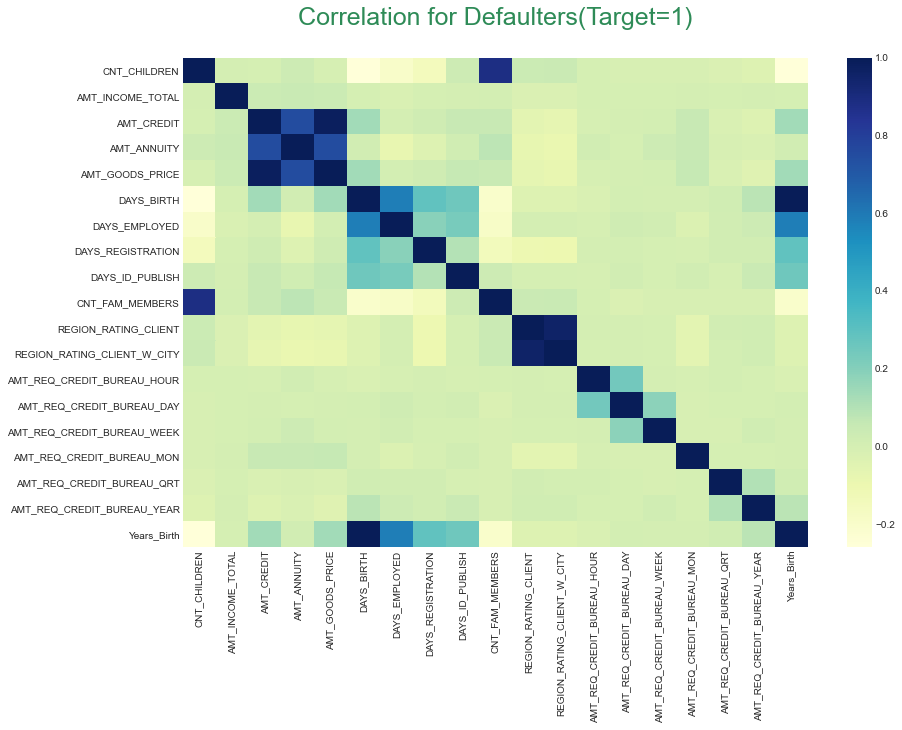

In [85]:
plt.figure(figsize=[14,9])
sns.heatmap(target1_corr, annot=False, cmap='YlGnBu')
plt.title('Correlation for Defaulters(Target=1)\n', fontsize=25, color='Seagreen')
plt.show()

- The heat map shows the correlation among the parameters for the defaulters.
- There is a high correlation between credit, annuity and goods price among defaulters.
- There is high positive correlation between days employed and birth year stating that work experience increases with age.
- There is a high correlation between family member count and number of children. 
- We can also observe that the region rating per client also have a high correlation given the fact that the clients are segregated well region wise and rated accordingly hence, it is an organized approach.
- Overall the parameters demonstrate lower correlation compared to non-defaulters probably because the count is less.


## Bottom 10 Correlation for Target=1

In [86]:
corr1 = target1_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr1 = corr1[corr1 != 1.0]
corr1.head(10)

AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_WEEK     0.000018
AMT_REQ_CREDIT_BUREAU_WEEK   AMT_INCOME_TOTAL               0.000018
AMT_INCOME_TOTAL             DAYS_REGISTRATION              0.000158
DAYS_REGISTRATION            AMT_INCOME_TOTAL               0.000158
REGION_RATING_CLIENT_W_CITY  AMT_REQ_CREDIT_BUREAU_WEEK     0.000255
AMT_REQ_CREDIT_BUREAU_WEEK   REGION_RATING_CLIENT_W_CITY    0.000255
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_DAY      0.000272
AMT_REQ_CREDIT_BUREAU_DAY    AMT_INCOME_TOTAL               0.000272
                             AMT_ANNUITY                    0.000294
AMT_ANNUITY                  AMT_REQ_CREDIT_BUREAU_DAY      0.000294
dtype: float64

## Top 10 Correlation for Target=1

In [87]:
corr1.tail(10)

AMT_GOODS_PRICE              AMT_ANNUITY                    0.752699
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752699
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
AMT_GOODS_PRICE              AMT_CREDIT                     0.983103
AMT_CREDIT                   AMT_GOODS_PRICE                0.983103
DAYS_BIRTH                   Years_Birth                    1.000000
Years_Birth                  DAYS_BIRTH                     1.000000
dtype: float64

# Working on Previous Application data.

In [88]:
prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved            -73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved           -164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved           -301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved           -512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high

In [89]:
#Checking description
prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06     1.284699e+06             1.670214e+06            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05     2.278473e+05             1.248418e+01            9.964675e-01  -8.806797e+02      3.139511e+02  1.605408e+01
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05     3.153966e+05             3.334028e+00            5.932963e-02   7.790997e+02      7.127443e+03  1.456729e+01
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00             0.000000e+00            0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04     5.084100e+04             1.000000e+01            1.000000e+00  -1.300000e+03     -1.000000e+00  6.000000e+00
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04     1.123200e+05             1.200000e+01            1.000000e+00  -5.810000e+02      3.000000e+00  1.200000e+01
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05     2.340000e+05             1.500000e+01            1.000000e+00  -2.800000e+02      8.200000e+01  2.400000e+01
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06             2.300000e+01            1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

# Data quality check and making necessary changes

### We  see that there are some values in the data set in the DAYS_DECISION column which has negative values and also some columns which has XAN and XAP values, which needs to be handled/standardized.

In [90]:
prev['DAYS_DECISION']=abs(prev['DAYS_DECISION'])

In [91]:
prev=prev.replace('XAP', np.NaN)
prev=prev.replace('XNA', np.NaN)

In [92]:
prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    NaN             Approved             73  Cash through the bank                NaN         Repeater              Mobile            POS               NaN             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    NaN             Approved            164                    NaN                NaN         Repeater                 NaN           Cash            x-sell           Contact center                -1                  NaN         36.0       low_action          Cash X-Sell: low
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    NaN             Approved            301  Cash through the bank                NaN         Repeater                 NaN           Cash            x-sell  Credit and cash offices                -1                  NaN         12.0             high         Cash X-Sell: high
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    NaN             Approved            512  Cash through the bank                NaN         Repeater                 NaN           Cash            x-sell  Credit and cash offices                -1                  NaN         12.0           middle       Cash X-Sell: middle
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused            781  Cash through the bank                 HC         Repeater                 NaN           Cash           walk-in  Credit and cash offices                -1                  NaN         24.0             high         Cash Street: high

In [93]:
##Dropping few more columns which does not seem to be relevant
cols_drop=['NAME_SELLER_INDUSTRY','CNT_PAYMENT','SELLERPLACE_AREA']
prev.drop(cols_drop, axis=1, inplace=True)

### Merging both the data set.

In [94]:
loan_merge=prev.merge(app,on=['SK_ID_CURR'], how='inner')

In [95]:
loan_merge.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  AMT_APPLICATION  AMT_CREDIT_x  AMT_GOODS_PRICE_x WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE      CHANNEL_TYPE NAME_YIELD_GROUP         PRODUCT_COMBINATION  TARGET NAME_CONTRACT_TYPE_y CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_y  AMT_ANNUITY_y  AMT_GOODS_PRICE_y NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  Years_Birth    Age_bucket Credit_bucket     Income_group
0     2030495      271877       Consumer loans       1730.430          17145.0       17145.0            17145.0                   SATURDAY                       15                           Y                       1                    NaN             Approved             73  Cash through the bank                NaN         Repeater                    Mobile            POS               NaN      Country-wide           middle    POS mobile with interest       0           Cash loans           F            N               Y             1          225000.0      533668.5        25803.0           477000.0   Unaccompanied         State servant              Incomplete higher            Married  House / apartment       14443           7392             8447.0             4120                    NaN              3.0                     1                            1          Military                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    39.569863  (35.0, 40.0]        Medium  Standard Income
1     1696966      271877       Consumer loans      68258.655        1800000.0     1754721.0          1800000.0                   SATURDAY                       18                           Y                       1                    NaN              Refused            472  Cash through the bank                SCO         Repeater  Clothing and Accessories            POS               NaN  Regional / Local       low_normal  POS industry with interest       0           Cash loans           F            N               Y             1          225000.0      533668.5        25803.0           477000.0   Unaccompanied         State servant              Incomplete higher            Married  House / apartment       14443           7392             8447.0             4120                    NaN              3.0                     1                            1          Military                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    39.569863  (35.0, 40.0]        Medium  Standard Income
2     2154916      271877       Consumer loans      12417.390         108400.5      119848.5           108400.5                     SUNDAY                       14                           Y                       1                    NaN             Approved            548  Cash through the bank                NaN              New                 Furniture            POS               NaN             Stone           middle  POS industry with interest       0           Cash loans           F            N               Y             1          225000.0      533668.5        25803.0           477000.0   Unaccompanied         State servant              Incomplete higher     

In [96]:
##Checking null value percentage, storing it in loan_null
loan_null=(loan_merge.isnull().sum()/loan_merge.shape[0]*100).round(2)
loan_null

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE_x            0.02
AMT_ANNUITY_x                  21.73
AMT_APPLICATION                 0.00
AMT_CREDIT_x                    0.00
AMT_GOODS_PRICE_x              22.60
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE         95.80
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE              36.99
CODE_REJECT_REASON             81.34
NAME_CLIENT_TYPE                0.11
NAME_GOODS_CATEGORY            56.39
NAME_PORTFOLIO                 21.73
NAME_PRODUCT_TYPE              63.67
CHANNEL_TYPE                    0.00
NAME_YIELD_GROUP               30.36
PRODUCT_COMBINATION             0.02
TARGET                          0.00
NAME_CONTRACT_TYPE_y            0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
F

### We  are able to see some columns with high null values, so taking a call to drop off these columns

In [97]:
loan_merge=loan_merge.loc[:,loan_null<=50]

### Renaming the columns, with '_prev' for columns with same attribute name representing to previous dataset and '_app' representing to application data set.

In [98]:
for i in loan_merge.columns:
    if '_x' in i:
        loan_merge=loan_merge.rename(columns={i:i.replace('_x','_prev')})
    elif '_y' in i:
        loan_merge=loan_merge.rename(columns={i:i.replace('_y','_app')})
    else:
        pass

In [99]:
loan_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1413701 non-null  int64   
 1   SK_ID_CURR                   1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_prev      1413388 non-null  object  
 3   AMT_ANNUITY_prev             1106483 non-null  float64 
 4   AMT_APPLICATION              1413701 non-null  float64 
 5   AMT_CREDIT_prev              1413700 non-null  float64 
 6   AMT_GOODS_PRICE_prev         1094176 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object  
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64   
 11  NAME_CONTRACT_STATUS         1413701 non-null  object  
 12  DAYS_DECISION               

In [100]:
loan_merge.shape

(1413701, 53)

In [101]:
##Dropping few unneccessary columns to make the dataset shorter.

cols_drop=['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
           'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_LAST_APPL_PER_CONTRACT',
          'NFLAG_LAST_APPL_IN_DAY','FLAG_OWN_CAR','FLAG_OWN_REALTY','CHANNEL_TYPE']
loan_merge.drop(columns=cols_drop, axis=1, inplace=True)

In [102]:
loan_merge.shape

(1413701, 40)

### Let's segregate the numeric and categorical columns for better analysis.

In [103]:
num_cols=[]
cate_cols=[]
for i in loan_merge.columns:
    if loan_merge[i].dtype in ('int64','float64','int32'):
        num_cols.append(i)
    else:
        cate_cols.append(i)

In [104]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY_prev',
 'AMT_APPLICATION',
 'AMT_CREDIT_prev',
 'AMT_GOODS_PRICE_prev',
 'HOUR_APPR_PROCESS_START',
 'DAYS_DECISION',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_app',
 'AMT_ANNUITY_app',
 'AMT_GOODS_PRICE_app',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'Years_Birth']

In [105]:
cate_cols

['NAME_CONTRACT_TYPE_prev',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'NAME_CONTRACT_TYPE_app',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'Age_bucket',
 'Credit_bucket',
 'Income_group']

# Univariate(Categorical) Analysis

### Analysis of Name_Contract_Type with respect to the Gender

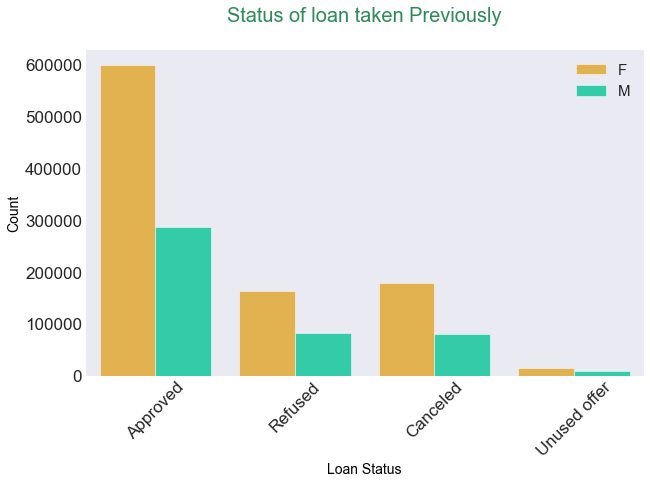

In [106]:
plt.figure(figsize=[10,6])
sns.countplot(loan_merge['NAME_CONTRACT_STATUS'],hue=loan_merge['CODE_GENDER'],palette='turbo_r')
plt.title('Status of loan taken Previously\n', fontdict={'fontsize':20, 'color':'Seagreen'})
plt.xlabel('Loan Status', fontdict={'fontsize':14, 'color':'Black'})
plt.ylabel('Count', fontdict={'fontsize':14, 'color':'Black'})
plt.xticks(fontsize=17,rotation=45)
plt.yticks(fontsize=17)
plt.legend(fontsize=15,loc='upper right')

plt.show()

### Inferences

## Inferences

- From here we are able to see that the loans are being approved to more Females than males previously and hence we could     see from the application data set that females are more likely to default than males as the most of the female are from     secondary education type and having a low income, hence the chances are higher.
- Also the bank seems to be approving loans more often, this might be because of the increase in business and not taking     the risk to manage loss is actually being a loss for the bank.

### Analysis of Name_Contract_Type with Target Wise(0&1)

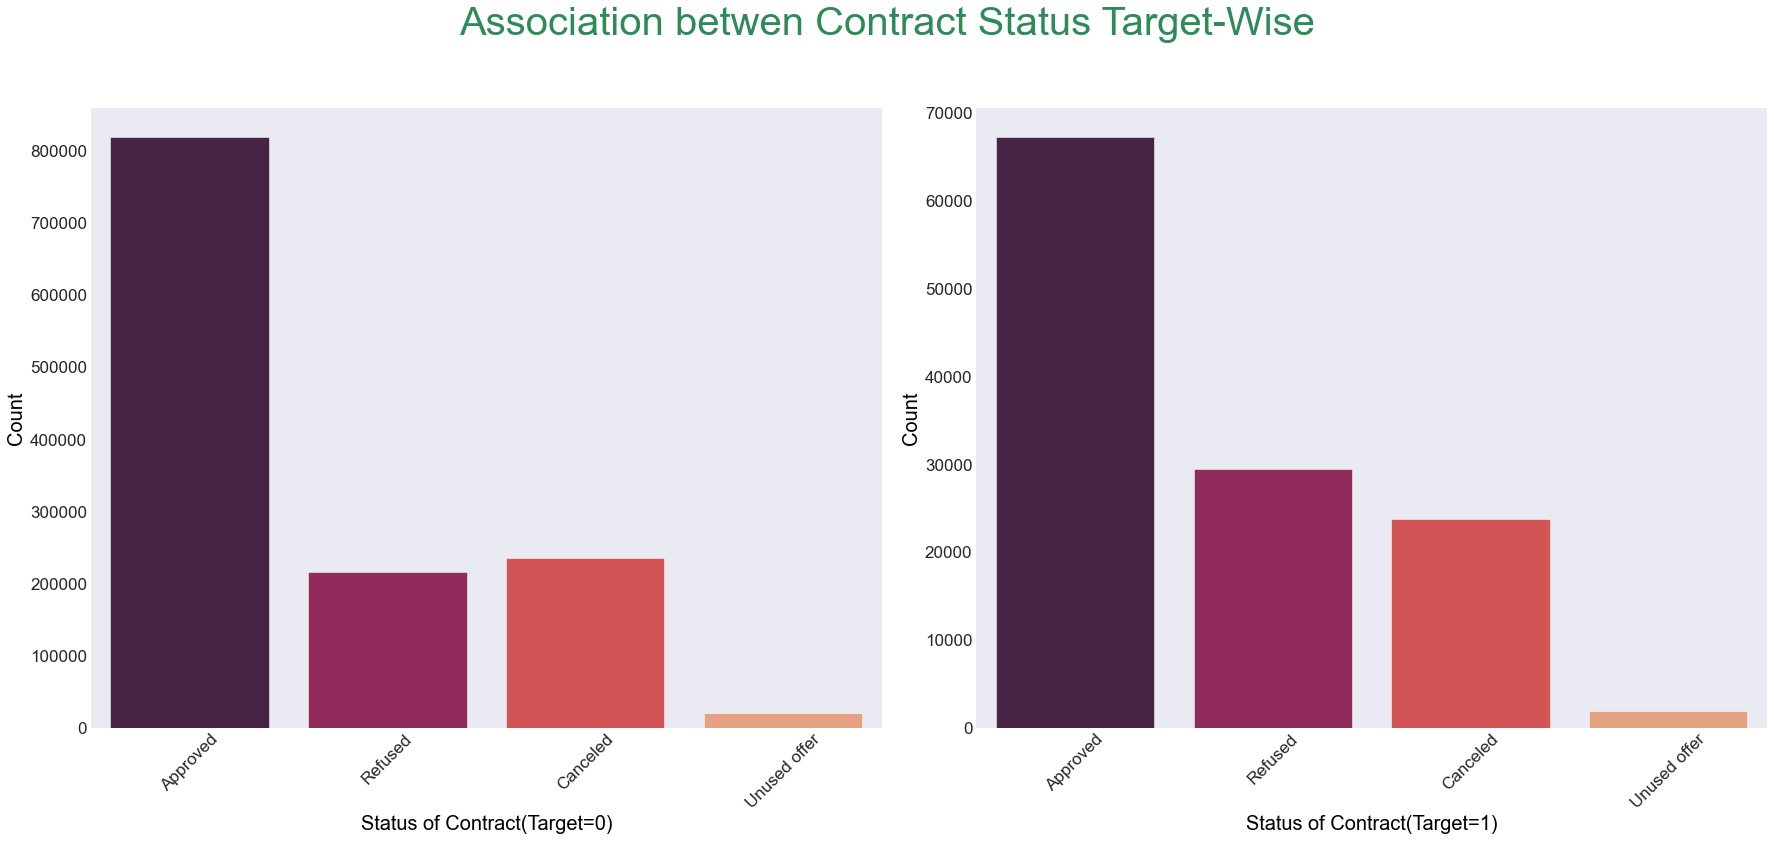

In [107]:
plt.figure(figsize=[25,12])
plt.gcf().suptitle("Association betwen Contract Status Target-Wise\n",fontsize=40,color='seagreen')
plt.subplot(1,2,1)
sns.countplot(loan_merge[loan_merge['TARGET']==0]['NAME_CONTRACT_STATUS'], palette='rocket')
plt.xlabel('Status of Contract(Target=0)',fontdict={'fontsize':20, 'color':'Black'})
plt.ylabel('Count',fontdict={'fontsize':20, 'color':'Black'})
plt.xticks(fontsize=17,rotation=45)
plt.yticks(fontsize=17)

plt.subplot(1,2,2)
sns.countplot(loan_merge[loan_merge['TARGET']==1]['NAME_CONTRACT_STATUS'], palette='rocket')
plt.xlabel('Status of Contract(Target=1)',fontdict={'fontsize':20, 'color':'Black'})
plt.ylabel('Count',fontdict={'fontsize':20, 'color':'Black'})
plt.xticks(fontsize=17,rotation=45)
plt.yticks(fontsize=17)


plt.tight_layout(pad=2.0)
plt.show()

### Inferences

- From  the above graph  we are able to see that for the people who are not defaluting the approved loans are on the higher   side than the people who are defaulting.
- We saw that  the people who are defaulting are younger and  bank seems to pass the loans considering a good motive,         however due some negative impact those people were not able to pay off the loan which lead to a loss for the bank. 
- It seems strange that the bank is refusing loans to the eligible customers who can actually help bank to make money,       hence bank to incur loss itself.Similarly the refused and cancelled percentage should be higher for the defaulters.

### Analysis of Age-Bucket with respect to the Name_Contract_Type

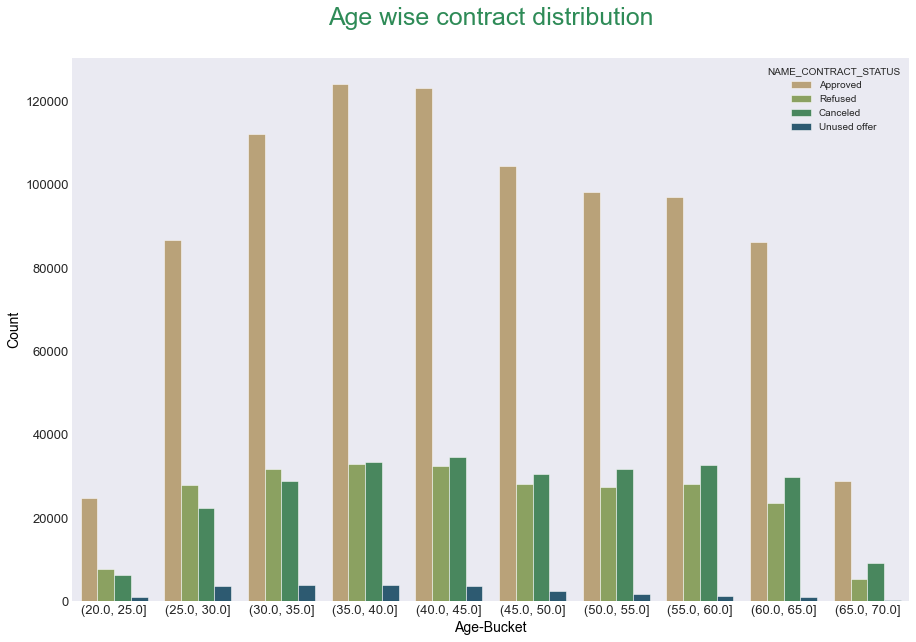

In [108]:
plt.figure(figsize=[15,10])
sns.countplot(loan_merge['Age_bucket'],hue=loan_merge['NAME_CONTRACT_STATUS'],palette='gist_earth_r')
plt.title('Age wise contract distribution\n', fontdict={'fontsize':25, 'color':'Seagreen'})
plt.xlabel('Age-Bucket', fontdict={'fontsize':14, 'color':'Black'})
plt.ylabel('Count', fontdict={'fontsize':14, 'color':'Black'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### Inferences

- It seems  that the people in the age group 35-40 are getting more as approved as compared to others, moreover it can be thought of like, people in  this segment has a better year of experience as compared to others.

- One of the unusual patters is people in  the age bucket 20-25 more approved loans than cancelled loans, this can lead to defaulting of loans as very few % of people in this segment has good savings to back up. If also  the loan is being passed to this group, the interest rate should be considerably high as compared to other people.

# Bivariate Analysis(Numerical-Numerical) 

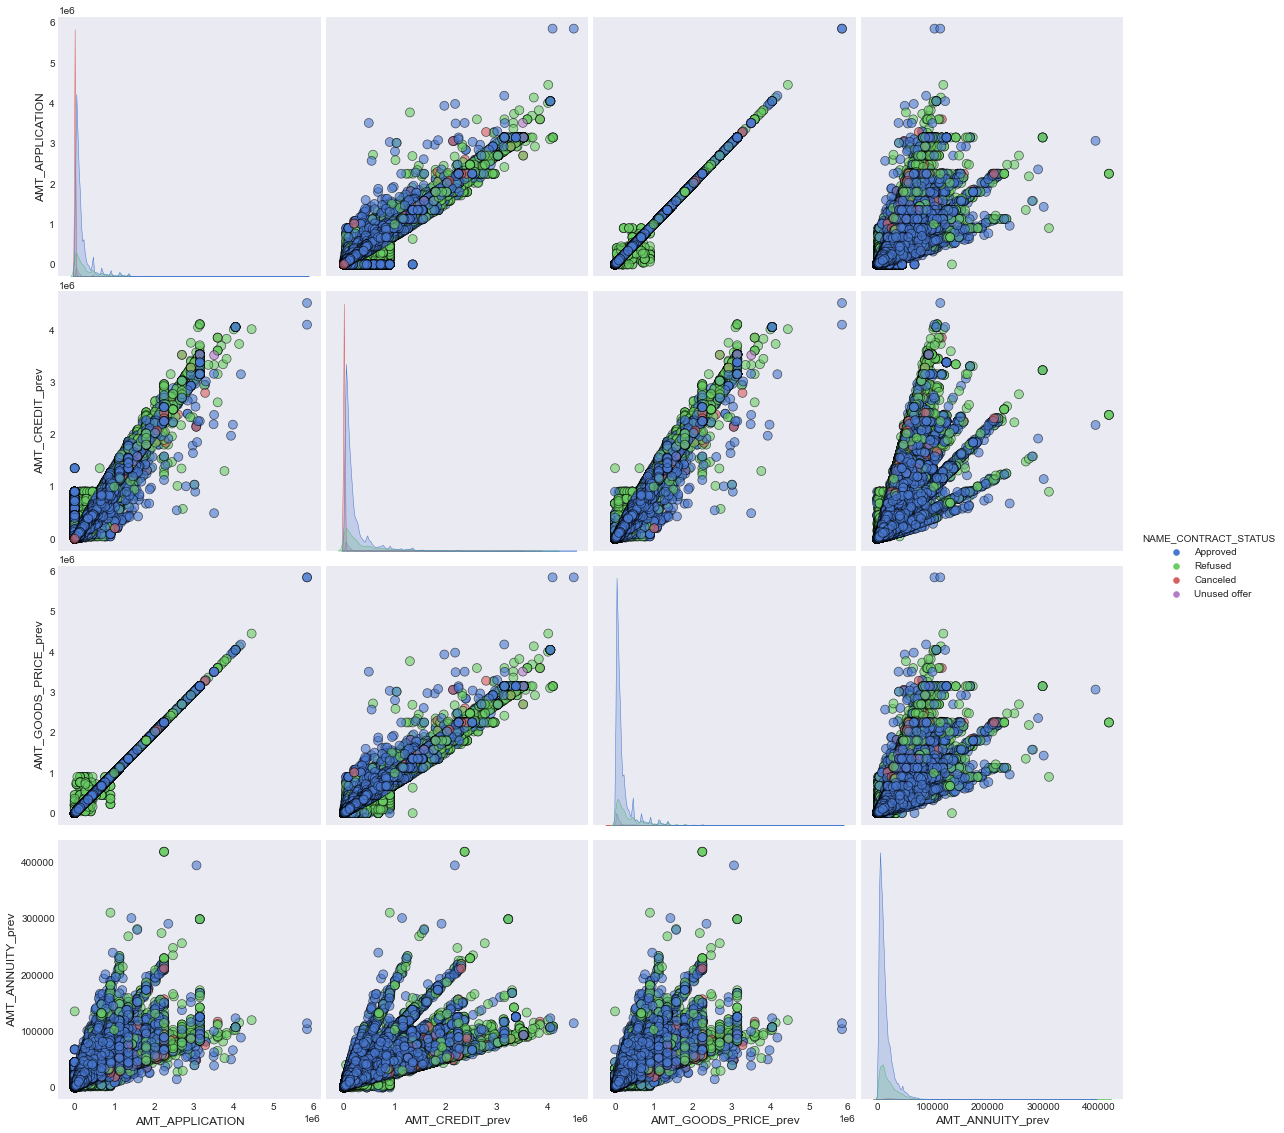

In [109]:
sns.pairplot(loan_merge,vars=['AMT_APPLICATION','AMT_CREDIT_prev','AMT_GOODS_PRICE_prev','AMT_ANNUITY_prev'],hue='NAME_CONTRACT_STATUS',plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)
plt.show()

### Inferences

- From the above plot we are able to  make  out that as the credit amount increases with the increase in asked application amount from the client, banks become more vigilant and do some thorough checks of clients credit history and  could see most of the loans are refused at higher credit. But still there are spots in the graph that bank do spproves the loan at higher credits but the annuity saturates at 20 Lakhs which is again a drawback in the bank's end. So, if a higher amount of loan is disburesed the credit amount should go higher such  that people have a fear of paying a huge chunk if loans are defaulted at higher amount.

# Multivariate Analysis

### Distribution of contract status with respect to the payment type

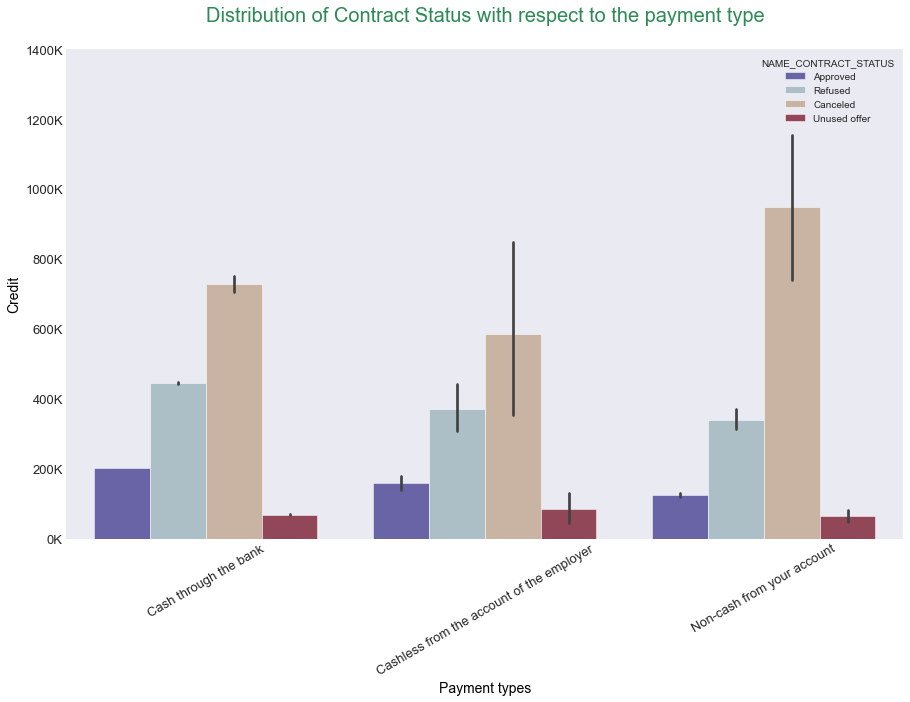

In [110]:
plt.figure(figsize=[15,9])
sns.barplot(loan_merge['NAME_PAYMENT_TYPE'], loan_merge['AMT_CREDIT_prev'], hue=loan_merge['NAME_CONTRACT_STATUS'],palette='twilight_shifted')
plt.title('Distribution of Contract Status with respect to the payment type\n',fontdict={'fontsize':20, 'color':'Seagreen'})
plt.xlabel('Payment types',fontdict={'fontsize':14, 'color':'Black'})
plt.ylabel('Credit',fontdict={'fontsize':14, 'color':'Black'})
ticks=np.arange(0,1500000,200000)
labels=['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.xticks(fontsize=13,rotation=30)
plt.yticks(fontsize=13)
plt.show()

### Inferences

- Apart from all  the payment types we could see that, payment through the bank from where the loan is taken is being the preferred payment method  as comapred to other two which is pretty well understood as th loan taken can be deducated in the form of EMI's where the bank need not to get in touch with the  client asking for repaying.

- People falling at the low income group might have opted for the self payment that is Non Cash payment from the clients account as they might  not have enough amount at the EMI dates approaches and hence the bank rejects the loan in  that case.

# Conclusions:

### From this EDA Credit Case Study we conclude that:

- Only around 8% of the people default in repaying their bank loans.
- People tend to prefer cash loans compared to revolving loans.
- Females apply for more loans compared to male and also have a higher approval rate.
- Defaulters majorly lie among low income groups with secondary or lower education and take medium to high credit which they are unable to repay and they are mostly females.
- Blue collar job people tend to apply for cash loans more compared to white collar jobs and they in turn tend to default more as they do not have a significant monetary backup.
- Business Segment and self employed is risky to lend loans to as it can be understood that ventures may/may not boost up their revenue which significantly affects paying back of loans.
- People in the age group 30-50 apply for more loans as they are already established and may have additional family to cater to. People in the younger age (20-30)and older age group (60+) apply less and have lower approval rates as they do not have significant income inflow. We also saw that the younger age group tends to default more. 
- Correlation pattern is the same for both defaulters and non-defaulters. There is strong correlation between income, credit, annuity and goods price.
- Cash loans directly from banks see more approval than non-cash from banks. Also as the credit increases, the refusal rate is more. This eventually implies that the banks generally look forward to disburse loans to more clients/applicants.
